# Load Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 

In [2]:
## Change working directory
os.chdir('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1')

In [322]:
#load and look at the head of the features
data = pd.read_csv("features.csv", sep=',', index_col="id") 
data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [323]:
#check the data shape
data.shape

(59400, 39)

In [324]:
#load and look at the head of the labels
data_target = pd.read_csv("labels.csv", sep=',', index_col="id") 
data_target.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


# 2. Data Cleaning
### Note about cardinality: 
#### This dataset contains several features with high cardinality. This can make decision tree building a very lengthy and computationally-heavy process. Given that KNN and Naive Bayes require binary dummy variables to be made, high cardinality also causes a problem of high dimensionality. We know from the concept of "The Curse of Dimensionality" that the ratio between the nearest and farthest points approaches 1, meaning that points become indistinguishable from each other, which is a problem for KNN in particular. High dimensionality also tends to lead to overfitting. For all of these reasons, features will be scrutinized for high cardinality.

In [325]:
#check that pandas assigned the correct data types
data.dtypes

amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

In [326]:
# set print options so that data is never supressed from view
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [327]:
# look at descriptive statistics:
data.describe(include="all")

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,59400,59029,59400,59400.000000,59400.000000,59400,59400,59400.000000,56066,59400,55523,31234,56344,59400.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,9,19287,21,NaN,NaN,125,2092,NaN,2,1,12,2696,2,NaN,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,NaN,3/15/2011,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,Lake Victoria,Madukani,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd,VWC,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,10248,508,5294,NaN,NaN,2503,307,NaN,51011,59400,36793,682,38852,NaN,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,NaN,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN,NaN,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,NaN,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN,NaN,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
#see how many rows contain nulls:
not_null = data.dropna()
print(data.shape[0] - not_null.shape[0])
print(data.shape)
print(not_null.shape)

31587
(59400, 39)
(27813, 39)


In [329]:
# look to see what kind of values are included in the different features:
data["funder"].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

#### Although `funder` is pretty messy (e.g. misspellings, unintelligible values), it appears that there are several values that occur quite frequently, and thus this variable has potential to be useful in prediction. 

In [330]:
data["population"].value_counts()

0        21381
1         7025
200       1940
150       1892
250       1681
300       1476
100       1146
50        1139
500       1009
350        986
120        916
400        775
60         706
30         626
40         552
80         533
450        499
20         462
600        438
230        388
75         289
1000       278
800        269
90         265
130        264
25         255
320        249
35         245
360        222
140        215
210        209
70         209
45         205
15         193
700        192
1500       190
180        183
650        177
65         175
1200       168
10         163
420        162
240        154
750        153
56         150
2000       130
160        127
260        125
55         116
125        113
96         112
540        110
560        106
280        104
550        101
86          99
380         80
98          77
340         77
220         74
170         72
270         72
85          70
900         70
520         69
256         66
530       

#### 21,381 records have a `population` of 0, and 7,025 have a `population` of 1. These may or may not have meaning, but since I do not know, I will assume they are NA and code them as such.

In [331]:
# code populations of 0 and 1 to NA:
data['population'] = data['population'].replace(0, np.NaN)
data['population'] = data['population'].replace(1, np.NaN)

In [332]:
data["population"].value_counts()

200.0      1940
150.0      1892
250.0      1681
300.0      1476
100.0      1146
50.0       1139
500.0      1009
350.0       986
120.0       916
400.0       775
60.0        706
30.0        626
40.0        552
80.0        533
450.0       499
20.0        462
600.0       438
230.0       388
75.0        289
1000.0      278
800.0       269
90.0        265
130.0       264
25.0        255
320.0       249
35.0        245
360.0       222
140.0       215
210.0       209
70.0        209
45.0        205
15.0        193
700.0       192
1500.0      190
180.0       183
650.0       177
65.0        175
1200.0      168
10.0        163
420.0       162
240.0       154
750.0       153
56.0        150
2000.0      130
160.0       127
260.0       125
55.0        116
125.0       113
96.0        112
540.0       110
560.0       106
280.0       104
550.0       101
86.0         99
380.0        80
98.0         77
340.0        77
220.0        74
170.0        72
270.0        72
85.0         70
900.0        70
520.0   

In [333]:
#check that the number of NaNs makes sense:
pd.isnull(data["population"]).sum()

28406

In [334]:
data["construction_year"].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

#### 20,709 records have 0 as `construction_year`, so we will code those as NaN

In [335]:
data['construction_year'] = data['construction_year'].replace(0, np.NaN)

In [336]:
data["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [337]:
data["extraction_type_group"].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [338]:
data["extraction_type_class"].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

#### `extraction_type`, `extraction_type_group`, and `extraction_type_class` look to contain redundant information. `extraction_type` is the most granular and thus information-rich, however it is less scrutable to a non-domain expert. It could also lead to more branches on a decision tree than are necessary, due to the redundancy. I would also like to keep cardinality to a minimum, as explained above. For these reasons, we will use `extraction_type_class`.

In [339]:
# drop redundant columns
data = data.drop('extraction_type', axis=1)
data = data.drop('extraction_type_group', axis=1)
data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'], dtype='object')

In [340]:
data["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [341]:
data["management_group"].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

#### `management` and `management_group` contain redundant information as well, and for the same reasons as above, I would like to use `management_group`. However, I would prefer that `school` be made its own category, as opposed to being lumped in with `other`, as it could be predicitve information.

In [342]:
# if `management` == 'other - school', then change `management_group` to `school` 
data.loc[data.management == 'other - school', 'management_group'] = "school"

In [343]:
data["management_group"].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           844
unknown         561
school           99
Name: management_group, dtype: int64

In [344]:
#change `unknown` to NaN
data['management_group'] = data['management_group'].replace('unknown', np.NaN)

In [345]:
#throw out redundant feature:
data = data.drop('management', axis=1)

In [346]:
data["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [347]:
data["payment_type"].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

#### `payment` and `payment_type` are 100% redundant, and `payment` is coded slightly more scrutably, so we will throw out `payment_type`.

In [348]:
#throw out redundant feature:
data = data.drop('payment_type', axis=1)

In [349]:
#change `unknown` to NaN
data['payment'] = data['payment'].replace('unknown', np.NaN)

In [350]:
data["water_quality"].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [351]:
data["quality_group"].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

 #### `water_quality` and `quality_group` contain redundant information. For reasons of scrutability and conciseness, we will throw out `water_quality`.

In [352]:
#throw out redundant feature:
data = data.drop('water_quality', axis=1)

In [353]:
#change `unknown` to NaN
data['quality_group'] = data['quality_group'].replace('unknown', np.NaN)

In [354]:
data["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [355]:
data["quantity_group"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### `quantity` and `quantity_group` are 100% redundant, so we can throw out either one.

In [356]:
#throw out redundant feature:
data = data.drop('quantity_group', axis=1)

In [357]:
#change `unknown` to NaN
data['quantity'] = data['quantity'].replace('unknown', np.NaN)

In [358]:
data["source"].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [359]:
data["source_type"].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [360]:
data["source_class"].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

#### `source`, `source_type`, and `source_class` contain redundant information. `source` contains the most granular and information-rich data. I am not a domain expert, but I would assume water coming from rivers has less potential to clog a water pump than water coming from lakes. I like that `source` contains extra information that could well be predictive, so we will throw out the less-granular features. I believe in this case, the extra predictive potential justifies the extra cardinality.

In [361]:
#throw out redundant feature:
data = data.drop('source_type', axis=1)
data = data.drop('source_class', axis=1)

In [362]:
#change `unknown` to NaN
data['source'] = data['source'].replace('unknown', np.NaN)

In [363]:
data["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [364]:
data["waterpoint_type_group"].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

#### `waterpoint_type` and `waterpoint_type_group` are redundant except that the former distinguishes between `communal standpipe multiple` and `communal standpipe`. It is my hunch that multiple connections to a water pump could have some effect on how often the pump fails. For this reason, we will keep `waterpoint_type`.

In [365]:
#throw out redundant feature:
data = data.drop('waterpoint_type_group', axis=1)

In [366]:
data["amount_tsh"].value_counts()

0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
20000.00        45
3600.00         42
400.00          42
450.00          42
2200.00         31
700.00          24
4700.00         23
70.00           23
150.00          21
33.00           20
15000.00        16
60.00           15
15.00           15
2800.00         14
2.00            13
7200.00         12
1300.00         10
6500.00          9
25000.00         9
30000.00         8
7500.00          8
35.00            8
7000.00     

#### It is curious to me that the majority of instances (41,639) have an `amount_tsh` (amount water available to waterpoint) of 0. Looking at the raw data, I can see that many of these instances do serve a nonzero population, so it seems most likely that a value of 0 corresponds to unknown. For this reason we will code it as NaN.

In [367]:
#change `0` to NaN
data['amount_tsh'] = data['amount_tsh'].replace(0, np.NaN)

In [368]:
data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source', 'waterpoint_type'], dtype='object')

In [369]:
#isolate location data for scrutiny:
location_data = data[['basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'longitude', 'latitude']]
location_data.head()

,basin,subvillage,region,region_code,district_code,lga,ward,longitude,latitude
id,,,,,,,,,
69572,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,34.938093,-9.856322
8776,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,34.698766,-2.147466
34310,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,37.460664,-3.821329
67743,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,38.486161,-11.155298
19728,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,31.130847,-1.825359


In [370]:
#make sure all features are read as objects:
location_data= location_data.astype(object)
location_data.dtypes

basin            object
subvillage       object
region           object
region_code      object
district_code    object
lga              object
ward             object
longitude        object
latitude         object
dtype: object

In [371]:
# compare descriptive statistics for location data:
location_data.describe(include="all")

,basin,subvillage,region,region_code,district_code,lga,ward,longitude,latitude
count,59400,59029,59400,59400,59400,59400,59400,59400.0,5.940000e+04
unique,9,19287,21,27,20,125,2092,57516.0,5.751700e+04
top,Lake Victoria,Madukani,Iringa,11,1,Njombe,Igosi,0.0,-2.000000e-08
freq,10248,508,5294,5300,12203,2503,307,1812.0,1.812000e+03


#### The most common `longitude` and `longitude` pair is (0.0, -2.000000e-08) which is essentially (0,0). This is a point over the ocean and thus it equates to unknown, so we will code those values as such. 
#### `subvillage` has 19,287 unique values and thus is likely too granular to be predictive; it is almost a unique identifier. The cardinality is also far too high.
#### `region`, `region_code`, and `district_code` all appear to be redundant with each other, and contain roughly 20 values. This seems to be the right level of granularity for predictive power given that we are looking at water pumps in the entire geographic region of Tanzania. Thus, we can throw out `region_code` and `district_code`. The cardinality is still quite high, so we can consider throwing it out at a later point.
#### `basin` may be redundant with `region`, given that they are both geographic features, but it is possible that their geographic ranges are not the same and that one is more predictive than the other, so we will keep both for now.
#### `ward` contains 2,092 unique values, which justifies throwing it out on the basis of high cardinality.
#### `lga` has 125 unique values which is costly in the sense of cardinality, however it refers to the Local Government Authority of the area and thus could represent fiscal inequities which may relate to the functionality of the local water pumps. For this reason, we keep this feature for now.

In [372]:
# change (0,0) lat long to NaN:
data.loc[(data.latitude == -2.000000e-08) & (data.longitude == 0), ['latitude', 'longitude']] = [np.NaN, np.NaN]

In [373]:
#throw out redundant features:
data = data.drop(['subvillage', 'region_code', 'district_code', 'ward'], axis=1)

In [374]:
data["basin"].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [375]:
data["region"].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [376]:
data["lga"].value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Magu                 824
Kigoma Rural         824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Lushoto              694
Namtumbo             694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               544


In [377]:
data.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region', 'lga', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source', 'waterpoint_type'], dtype='object')

In [378]:
data["gps_height"].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
 1290       52
-14         51
 303        51
-18         49
-19         47
 1269       46
 1295       46
 1304       45
-23         45
 280        44
 1538       44
 1286       44
-8          44
-17         44
 1332       43
 320        43
 1317       42
 1293       42
 1319       42
 1359       42
 1264       42
 1288       42
 1401       42
 1303       42
-27         42
-6          41
 1272       41
 1613       41
 1152       41
 12         41
-11         41
 309        41
 1602       41
 1342       40
 1323       40
 336        40
 1322       40
 338        40
 1325       40
 1330       40
-21         40
 1180       40
-2          40
 1311       40
 1240       40
 1271       40
 1384       39
 1307       39
 1597       39
 1314       39
 17         39
 1289       39
 1370       39
 1329       38
 1582       38
 1270       38
 1407       38
 1306       38
-3          38
 1266       38
 1252       38
 306      

#### A large portion (20,438) of records have a `gps_height` of 0. This is curious, but since it falls within the realm of possibility, we will leave them as-is.

In [379]:
data["installer"].value_counts()

DWE                               17402
Government                         1825
RWE                                1206
Commu                              1060
DANIDA                             1050
KKKT                                898
Hesawa                              840
0                                   777
TCRS                                707
Central government                  622
CES                                 610
Community                           553
DANID                               552
District Council                    551
HESAWA                              539
World vision                        408
LGA                                 408
WEDECO                              397
TASAF                               396
District council                    392
Gover                               383
AMREF                               329
TWESA                               316
WU                                  301
Dmdd                                287


In [380]:
data["funder"].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In [381]:
data["num_private"].value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
50          5
38          4
58          4
9           4
10          4
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, dtype: int64

#### `installer` has 2,145 unique values, which means it's cardinality is out of the question for KNN and Naive Bayes. The same is true for `funder` (1,897	unique values). We can leave it in for the decision tree, as long as the tree can be built in a reasonable (read: not days) amount of time.

#### `date_recorded` is arbitrary, however `construction_year` could be very predictive, thus we will drop the former. `wpt_name` is a unique identifier, and it can be dropped as well. `num_private` is not described in the dataset description, and it is 0 in an overwhelming majority of cases, so we will throw it out as well.

In [382]:
#throw out arbitrary feature
data = data.drop(['date_recorded'], axis=1)
data = data.drop(['wpt_name'], axis=1)
data = data.drop(['num_private'], axis=1)

In [383]:
data["recorded_by"].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

#### `recorded_by` has the same value for all instances, and thus cannot be predictive and can be thrown out.

In [384]:
#throw out arbitrary feature
data = data.drop(['recorded_by'], axis=1)

In [385]:
data["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [386]:
data["scheme_name"].value_counts()

K                                               682
None                                            644
Borehole                                        546
Chalinze wate                                   405
M                                               400
DANIDA                                          379
Government                                      320
Ngana water supplied scheme                     270
wanging'ombe water supply s                     261
wanging'ombe supply scheme                      234
Bagamoyo wate                                   229
I                                               229
Uroki-Bomang'ombe water sup                     209
N                                               204
Kirua kahe gravity water supply trust           193
Machumba estate pipe line                       185
Makwale water supplied sche                     166
Kijiji                                          161
S                                               154
mtwango wate

#### `scheme_name` has 2,696 unique values, and thus has far too high cardinality to be kept.

In [387]:
#throw out arbitrary feature
data = data.drop(['scheme_name'], axis=1)

#### After cleaning irrelevant, redundant, and high-cardinality features, we are left with 21 predictors:

In [388]:
data.shape

(59400, 21)

In [389]:
data.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin', 'region', 'lga', 'population', 'public_meeting', 'scheme_management', 'permit', 'construction_year', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'quantity', 'source', 'waterpoint_type'], dtype='object')

In [390]:
#see a breakdown of nulls per feature:
pd.isnull(data).sum()

amount_tsh               41639
funder                    3635
gps_height                   0
installer                 3655
longitude                 1812
latitude                  1812
basin                        0
region                       0
lga                          0
population               28406
public_meeting            3334
scheme_management         3877
permit                    3056
construction_year        20709
extraction_type_class        0
management_group           561
payment                   8157
quality_group             1876
quantity                   789
source                      66
waterpoint_type              0
dtype: int64

In [391]:
#see how many rows contain nulls:
not_null = data.dropna()
print("Rows with NULL values: ", data.shape[0] - not_null.shape[0])
print("Rows without NULL values: ", not_null.shape[0])

Rows with NULL values:  46458
Rows without NULL values:  12942


#### Since we still have a large enough dataset after throwing out rows containing NULL values, we will do that. That leaves us with roughly 13K records.

In [392]:
#drop null records
data = data.dropna()

In [393]:
#join data on their indexes as a way to cull the dropped rows from the data_target
merged = data.merge(data_target, how='inner', on=None, left_index=True, right_index=True)

#separate the data_target again:
data_target = merged[['status_group']]
data_target.shape

(12942, 1)

In [394]:
data.dtypes

amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
region                    object
lga                       object
population               float64
public_meeting            object
scheme_management         object
permit                    object
construction_year        float64
extraction_type_class     object
management_group          object
payment                   object
quality_group             object
quantity                  object
source                    object
waterpoint_type           object
dtype: object

In [395]:
# look at descriptive statistics:
data.describe(include="all")

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,quality_group,quantity,source,waterpoint_type
count,12942.000000,12942,12942.000000,12942,12942.000000,12942.000000,12942,12942,12942,12942.000000,12942,12942,12942,12942.000000,12942,12942,12942,12942,12942,12942,12942
unique,NaN,522,NaN,588,NaN,NaN,9,17,76,NaN,2,12,2,NaN,7,5,6,5,4,9,6
top,NaN,Government Of Tanzania,NaN,DWE,NaN,NaN,Pangani,Iringa,Njombe,NaN,True,VWC,True,NaN,gravity,user-group,pay per bucket,good,enough,river,communal standpipe
freq,NaN,1431,NaN,3567,NaN,NaN,2935,2272,1649,NaN,12294,6900,10144,NaN,7375,11754,5301,11830,8893,4424,8410
mean,1011.014835,NaN,986.255602,NaN,35.757444,-6.402228,NaN,NaN,NaN,315.214109,NaN,NaN,NaN,1998.880080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4938.113352,NaN,602.175280,NaN,2.772454,2.525143,NaN,NaN,NaN,586.608418,NaN,NaN,NaN,11.349428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,-63.000000,NaN,29.607122,-11.566805,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,30.000000,NaN,414.000000,NaN,34.648514,-8.880797,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,250.000000,NaN,1064.000000,NaN,36.399392,-6.334675,NaN,NaN,NaN,160.000000,NaN,NaN,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,500.000000,NaN,1470.000000,NaN,37.697192,-4.323068,NaN,NaN,NaN,350.000000,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create dummy variables:

In [396]:
#create dummy variables
binary_data = pd.get_dummies(data, columns = ['funder', 'installer', 'basin', 'region', 'lga', 'public_meeting', 
                                              'scheme_management', 'permit','extraction_type_class', 'management_group', 
                                              'payment', 'quality_group', 'quantity', 'source', 'waterpoint_type'])
binary_data.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,funder_0,funder_A/co Germany,funder_Abasia,funder_Aco/germany,funder_Acra,funder_Action Aid,funder_Adb,funder_Adp Mombo,funder_Adra,funder_Af,funder_African,funder_African Barrick Gold,funder_African Muslim Agency,funder_African Reflections Foundation,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Agt Church,funder_Ai,funder_Aic,funder_Aic Church,funder_Alia,funder_Amref,funder_Amrefe,funder_Anglican Church,funder_Angrikana,funder_Auwasa,funder_Babtest,funder_Bahewasa,funder_Bakari Chimkube,funder_Batist Church,funder_Belgian Government,funder_Belgij,funder_Bened,funder_Bffs,funder_Br,funder_Bread For The Wor,funder_Bread Of The Worl,funder_British Tanza,funder_Bruder,funder_C,funder_Cafod,funder_Caritas,funder_Cast,funder_Cct,funder_Cdcg,funder_Cdtf,funder_Cefa,funder_Cefa-njombe,funder_Cefa/rcchurch,funder_Ces (gmbh),funder_Ces(gmbh),funder_Cg,funder_Cg/rc,funder_Cheni,funder_China Government,funder_Chuo,funder_Cipro,funder_Cipro/care,funder_Cipro/care/tcrs,funder_Cipro/government,funder_Co,funder_Community,funder_Concern,funder_Cpar,funder_Cper,funder_Cpps Mission,funder_Cpro,funder_Cspd,funder_Dadid,funder_Dadp,funder_Dads,funder_Dak,funder_Danida,funder_Dasp,funder_Dawasa,funder_Dawasco,funder_Ddca,funder_De,funder_Ded,funder_Devon Aid Korogwe,funder_Dfid,funder_Dh,funder_Dhv,funder_Dhv\norp,funder_Dimon,funder_District Council,funder_Dmd,funder_Dmdd,funder_Dmk,funder_Dokta Mwandulam,funder_Doner And Ded,funder_Donor,funder_Drdp,funder_Duka,funder_Dv,funder_Dwe,funder_Dwe And Veo,funder_Dwsdp,funder_Dwsp,funder_Dwt,funder_Ea,funder_Ebaha,funder_Egypt,funder_Erre Kappa,funder_Eu,funder_Eu/acra,funder_European Union,funder_Fao,funder_Farm Africa,funder_Fathe,funder_Father Bonifasi,funder_Fin Water,funder_Fini Water,funder_Finida German Tanzania Govt,funder_Finidagermantanzania Govt,funder_Finland,funder_Finland Government,funder_Finw,funder_Finwater,funder_Fpct,funder_Fpct Church,funder_Franc,funder_France,funder_Fw,funder_Ga,funder_Game Fronti,funder_Gen,funder_Geochaina,funder_Germany,funder_Germany Republi,funder_Giz,funder_Go,funder_Government /sda,funder_Government Of Tanzania,funder_Government/ Community,funder_Government/tcrs,funder_Grumeti,funder_Gt,funder_H,funder_H/w,funder_Haidomu Lutheran Church,funder_Halimashau,funder_Halmashaur,funder_Halmashauri,funder_Handeni Trunk Main(,funder_Handeni Trunk Maini,funder_Hans,funder_Happy Watoto Foundation,funder_Haruna Mpog,funder_Haydom Lutheran Hospital,funder_Hesawa,funder_Holla,funder_Hsw,funder_Htm,funder_Hw/rc,funder_Hydom Luthelani,funder_I Wash,funder_Idara Ya Maji,funder_Idc,funder_Idf,funder_Idydc,funder_Ifad,funder_Ikela Wa,funder_Il,funder_Imf,funder_Insititutiona,funder_Institution,funder_Ir,funder_Irc,funder_Irish Ai,funder_Is,funder_Isf,funder_Isf/government,funder_Isf/gvt,funder_Isf/tacare,funder_Islam,funder_Islamic,funder_Islamic Community,funder_Islamic Found,funder_Issa Mohamedi Tumwanga,funder_Jaica,funder_Japan,funder_Japan Embassy,funder_Japan Government,funder_Jica,funder_Jika,funder_Juhibu,funder_Kadip,funder_Kadp,funder_Kalitasi,funder_Kalta,funder_Kambi Migoko,funder_Kanis,funder_Kanisa Katoliki,funder_Kanisa Katoliki Lolovoni,funder_Kanisa La Menonite,funder_Kanisa La Tag,funder_Kata,funder_Ki,funder_Kibaha Town Council,funder_Kibo Brewaries,funder_Kidep,funder_Kidp,funder_Kigoma Municipal Council,funder_Kijiji,funder_Kilindi District Co,funder_Kitiangare Village Community,funder_Kiwanda Cha Tangawizi,funder_Kizego Jumaa,funder_Kkkt,funder_Kkkt Church,funder_Kondo Primary,funder_Konoike,funder_Kopwe Khalifa,funder_Ku,funder_Kuwait,funder_Kuwasa,funder_Kwa Makala,funder_Kwa Mzee Waziri,funder_Kwikwiz,funder_Laizer,funder_Lamp,funder_Laramatak,funder_Latfu,funder_Lc,funder_Lga,funder_Lga And Adb,funder_Lips,funder_Liuwassa,funder_Living Water International,funder_Lottery,funder_Lottery Club,funder_Lowasa,funder_Luke Samaras Ltd,funder_Luthe,funder_Lutheran Chu

In [397]:
binary_data.shape

(12942, 1276)

## Train, Validation, and Test Set (60:20:20)

In [398]:
from sklearn.model_selection import train_test_split

#divide the data into randomized training and test partitions:
train, testing, class_train, class_testing = train_test_split(binary_data, data_target, test_size=0.4, random_state=12)

#further divide the test partition into validation and test:
validation, test, class_validation, class_test = train_test_split(testing, class_testing, test_size=0.5, random_state=41)

print(train.shape)
print(class_train.shape)
print(validation.shape)
print(class_validation.shape)
print(test.shape)
print(class_test.shape)

(7765, 1276)
(7765, 1)
(2588, 1276)
(2588, 1)
(2589, 1276)
(2589, 1)


#### We would like to have at least 20 observations per feature. Using all dummy variables, we have 10 observations per feature, but can narrow that down during feature selection.

## Normalize using min and max of train set:
#### We use min-max scaling because it puts all data into the range 0 to 1, which pairs well with binary data so that everything is on the same scale.

In [80]:
from sklearn import preprocessing

# fit the min_max scaler based on the training data (note: if test data falls outside training data range, this normalization
# method will fail for those test records)
min_max_scaler = preprocessing.MinMaxScaler().fit(train) 

#normalize all data:
minmax_train = min_max_scaler.transform(train)
minmax_validation = min_max_scaler.transform(validation)
minmax_test = min_max_scaler.transform(test)

np.set_printoptions(precision=3, suppress=True) #round to 3 decimals and supress scientific notation
minmax_train[:5]

array([[ 0.   ,  0.02 ,  0.926, ...,  0.   ,  0.   ,  0.   ],
       [ 0.002,  0.668,  0.495, ...,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.095,  0.816, ...,  0.   ,  0.   ,  0.   ],
       [ 0.002,  0.771,  0.485, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.121,  0.883, ...,  0.   ,  0.   ,  0.   ]])

## Export data for future use:

In [85]:
#convert target dataframes to arrays and back to dataframes to get the same indicies as the feature set:
class_train_array = np.array(class_train)
class_train_df = pd.DataFrame(class_train_array, columns=class_train.columns)

class_validation_array = np.array(class_validation)
class_validation_df = pd.DataFrame(class_validation_array, columns=class_validation.columns)

class_test_array = np.array(class_test)
class_test_df = pd.DataFrame(class_test_array, columns=class_test.columns)

In [87]:
#convert the normalized data to a dataframe for easy indexing:
minmax_train_df = pd.DataFrame(minmax_train, columns=binary_data.columns)
minmax_validation_df = pd.DataFrame(minmax_validation, columns=binary_data.columns)
minmax_test_df = pd.DataFrame(minmax_test, columns=binary_data.columns)

In [88]:
#merge the train and target sets:
minmax_train_target_df = minmax_train_df.merge(class_train_df, how='outer', on=None, left_index=True, right_index=True)
minmax_validation_target_df = minmax_validation_df.merge(class_validation_df, how='outer', on=None, left_index=True, right_index=True)
minmax_test_target_df = minmax_test_df.merge(class_test_df, how='outer', on=None, left_index=True, right_index=True)

print(minmax_train_target_df.shape)
print(minmax_validation_target_df.shape)
print(minmax_test_target_df.shape)

(7765, 1277)
(2588, 1277)
(2589, 1277)


In [89]:
#export the datasets:
minmax_train_target_df.to_csv('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\minmax_train_target_df.csv', 
                              header=True, index=False, index_label=None) 
minmax_validation_target_df.to_csv('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\minmax_validation_target_df.csv', 
                              header=True, index=False, index_label=None)
minmax_test_target_df.to_csv('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\minmax_test_target_df.csv', 
                              header=True, index=False, index_label=None)

# 3. Exploratory Data Analysis

### Check distribution of numeric variables:

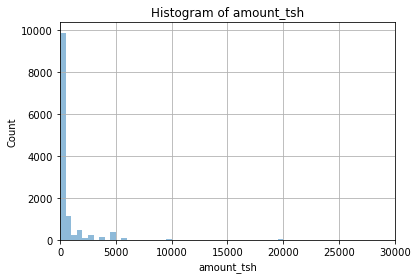

In [81]:
#create an array of the variable you want to graph
myarray = np.array(data["amount_tsh"])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel('amount_tsh')
plt.ylabel('Count')
plt.title('Histogram of amount_tsh')
plt.xlim((0, 30000))
plt.grid(True)
plt.show()

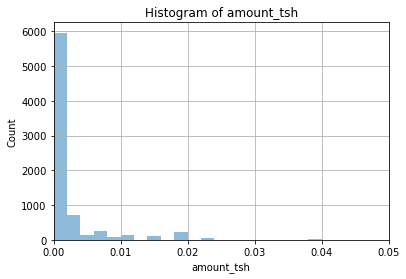

In [82]:
#convert the normalized data to a dataframe for easy indexing:
minmax_train_df = pd.DataFrame(minmax_train, columns=binary_data.columns)

#create an array of the variable you want to graph
myarray = np.array(minmax_train_df["amount_tsh"])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel('amount_tsh')
plt.ylabel('Count')
plt.title('Histogram of amount_tsh')
plt.xlim((0, .05))
plt.grid(True)
plt.show()

#### Note that the same pattern arises on the normalized data

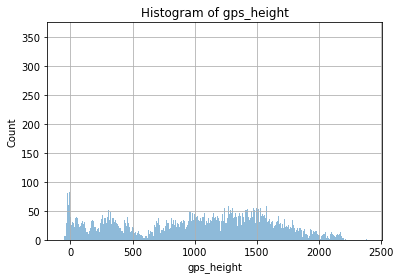

In [83]:
#create an array of the variable you want to graph
myvariable = "gps_height"
myarray = np.array(data[myvariable])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel(myvariable)
plt.ylabel('Count')
plt.title('Histogram of {}'.format(myvariable))
plt.grid(True)
plt.show()

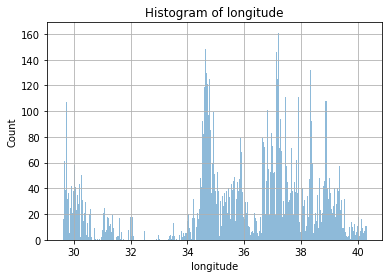

In [84]:
#create an array of the variable you want to graph
myvariable = "longitude"
myarray = np.array(data[myvariable])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel(myvariable)
plt.ylabel('Count')
plt.title('Histogram of {}'.format(myvariable))
plt.grid(True)
plt.show()

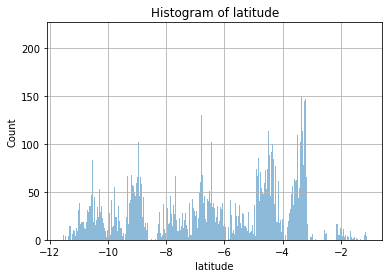

In [85]:
#create an array of the variable you want to graph
myvariable = "latitude"
myarray = np.array(data[myvariable])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel(myvariable)
plt.ylabel('Count')
plt.title('Histogram of {}'.format(myvariable))
plt.grid(True)
plt.show()

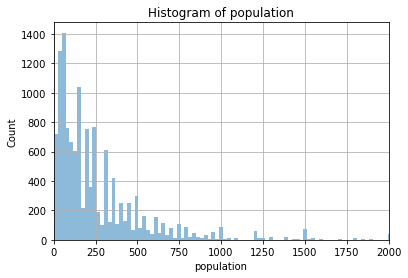

In [86]:
#create an array of the variable you want to graph
myvariable = "population"
myarray = np.array(data[myvariable])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel(myvariable)
plt.ylabel('Count')
plt.title('Histogram of {}'.format(myvariable))
plt.xlim((0, 2000))
plt.grid(True)
plt.show()

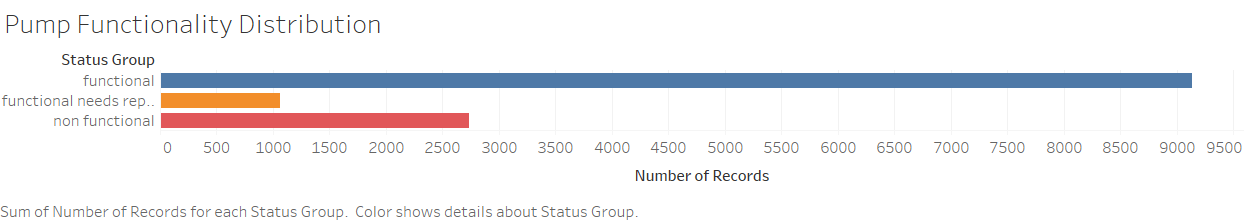

In [87]:
from IPython.display import Image
Image("C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\Picture1.png")

#made in Tableau by dragging the variable and its count to the row and column bar

#### We have an uneven distribution of pump functionality, which could cause problems for our classifiers, so we definitely need to do stratified sampling.

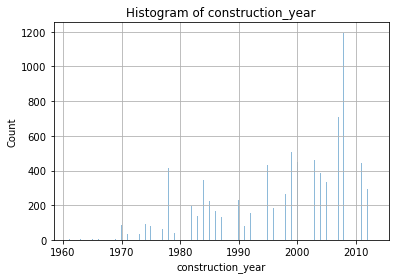

In [88]:
#create an array of the variable you want to graph
myvariable = "construction_year"
myarray = np.array(data[myvariable])

#plot a histogram:
plt.hist(myarray, bins=500, alpha=0.5,linewidth=2)
plt.xlabel(myvariable)
plt.ylabel('Count')
plt.title('Histogram of {}'.format(myvariable))
#plt.xlim((0, 2000))
plt.grid(True)
plt.show()

#### The Guassian NB algorithm assumes normality of numeric data, which is clearly not the case for this dataset. However, we can come back to this as an area for potential improvement if our models don't perform well.

status_group             functional  functional needs repair  non functional
basin                                                                       
Internal                        981                       50             218
Lake Nyasa                      671                       17             112
Lake Rukwa                      217                       51              55
Lake Tanganyika                 817                      462             400
Lake Victoria                   127                        9             112
Pangani                        2220                      145             570
Rufiji                         2008                      144             378
Ruvuma / Southern Coast         601                       96             351
Wami / Ruvu                    1497                       90             543


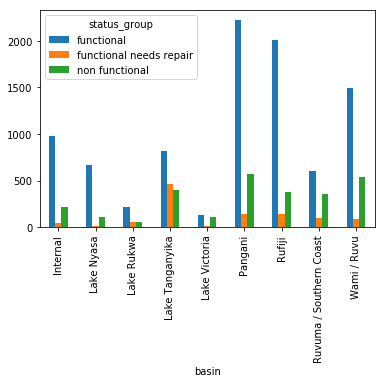

In [89]:
ct = pd.crosstab(data["basin"], data_target["status_group"])
print(ct)
plt.show(ct.plot(kind="bar"))

#### Here it looks like pumps in `Lake Tanganyika` have a higher likelihood of being in need of repair or nonfunctional.

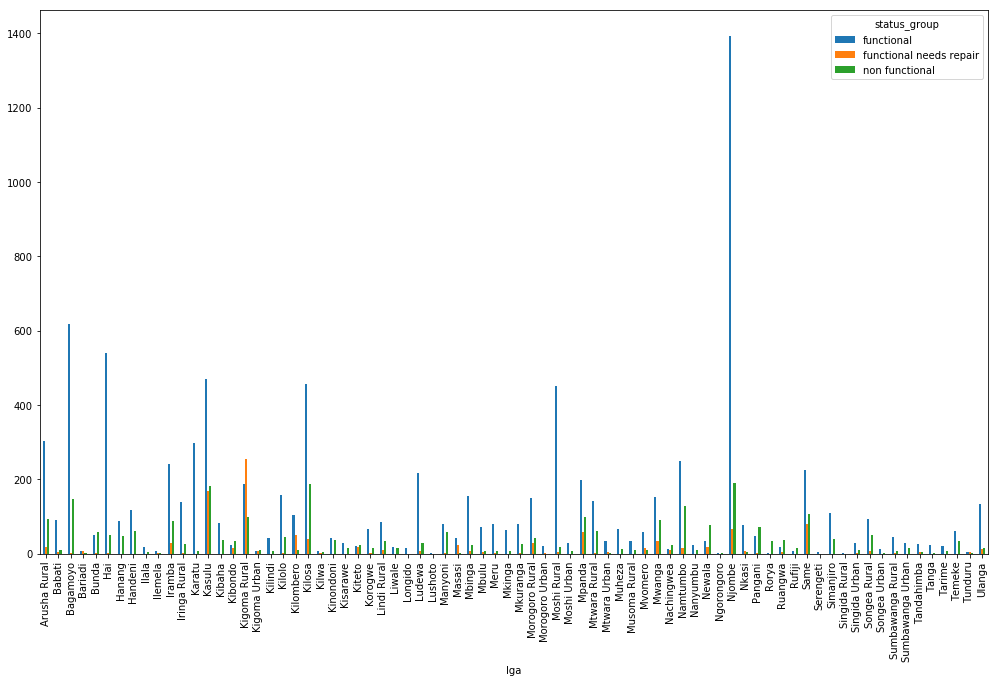

In [90]:
ct = pd.crosstab(data["lga"], data_target["status_group"])
#print(ct)
ct.plot(kind="bar", figsize=(17,10))

#### It looks like a local government authority of `Kigoma Rural` could be predictive of pumps needing repair.

status_group    functional  functional needs repair  non functional
public_meeting                                                     
False                  486                       33             129
True                  8653                     1031            2610


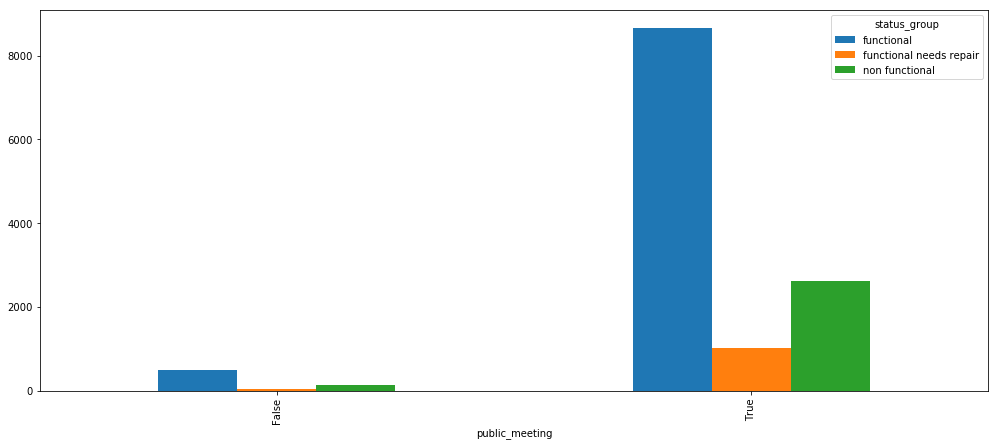

In [91]:
ct = pd.crosstab(data["public_meeting"], data_target["status_group"])
print(ct)
ct.plot(kind="bar", figsize=(17,7))

#### `public_meeting` does not look very predictive of pump functionality.

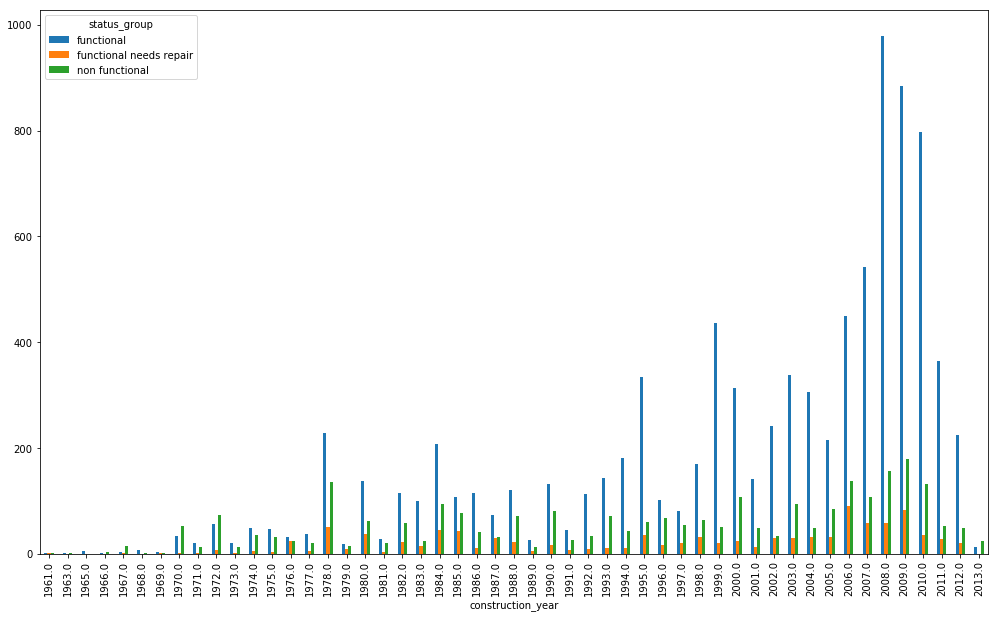

In [92]:
ct = pd.crosstab(data["construction_year"], data_target["status_group"])
#print(ct)
ct.plot(kind="bar", figsize=(17,10))

#### Not suprisingly, it looks like newer pumps tend to have a higher proportion of functionality than older pumps.

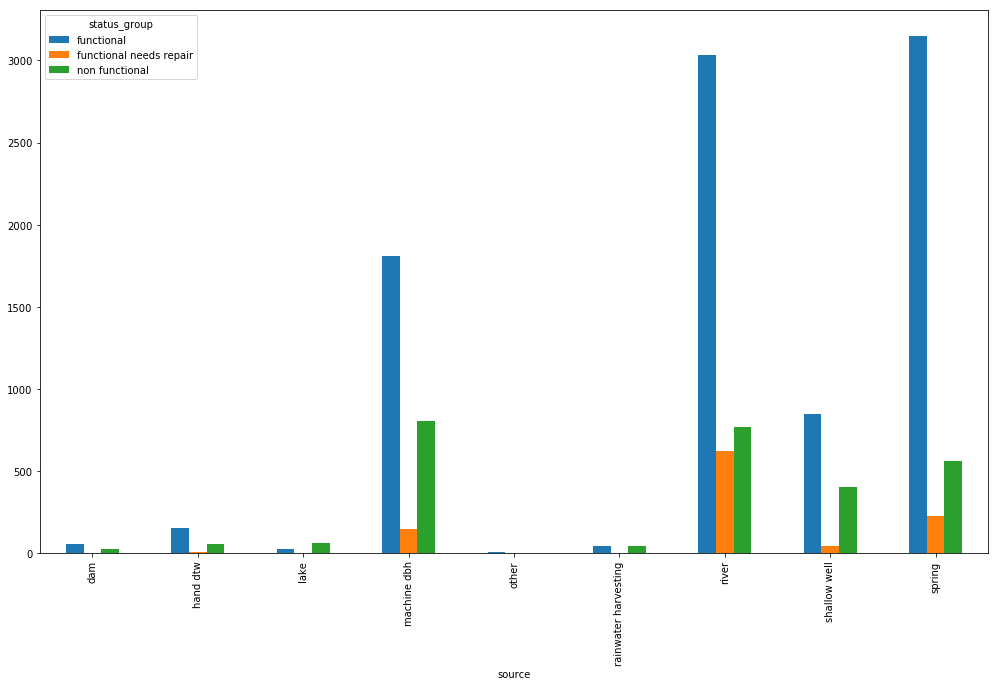

In [93]:
ct = pd.crosstab(data["source"], data_target["status_group"])
#print(ct)
ct.plot(kind="bar", figsize=(17,10))

#### Water coming from rivers and springs result in the most functional pumps, however water coming from rivers has a disproportionate number of pumps in need of repair. Water coming from lakes seems to be the most indicative of nonfunctionality, which makes sense because we might expect that water to contain more debris than springs and rivers.

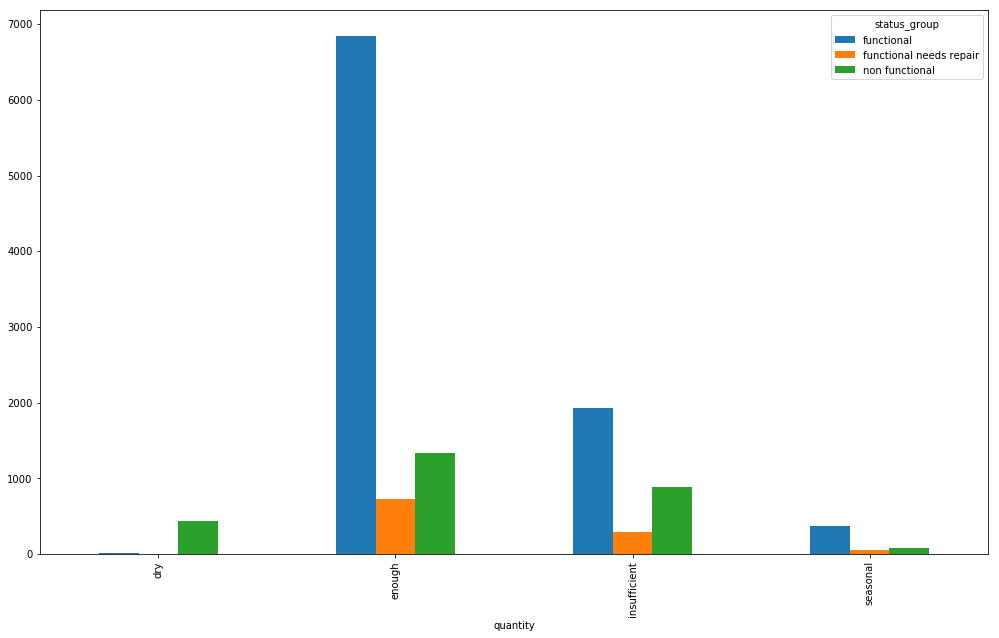

In [94]:
ct = pd.crosstab(data["quantity"], data_target["status_group"])
#print(ct)
ct.plot(kind="bar", figsize=(17,10))

#### Pumps whose quantity is enough are by far the most likely to be functional.

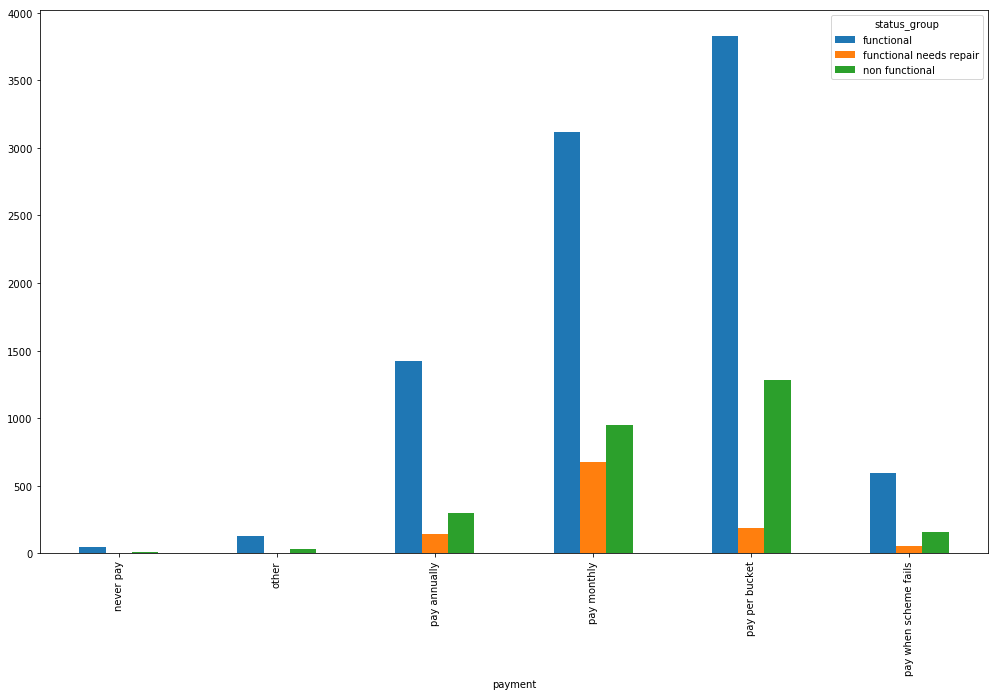

In [95]:
ct = pd.crosstab(data["payment"], data_target["status_group"])
#print(ct)
ct.plot(kind="bar", figsize=(17,10))

#### Interestingly, pumps where people pay only when the scheme fails or pay per bucket have the lowest proportions of pumps that are functional but need repair.

In [96]:
#merge the datasets so we can illuminate some of the relationships:
merged = data.merge(data_target, how='inner', on=None, left_index=True, right_index=True)

In [97]:
#export data for work in R:
merged.to_csv('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\merged.csv', header=True, index=True, 
              index_label=None) 

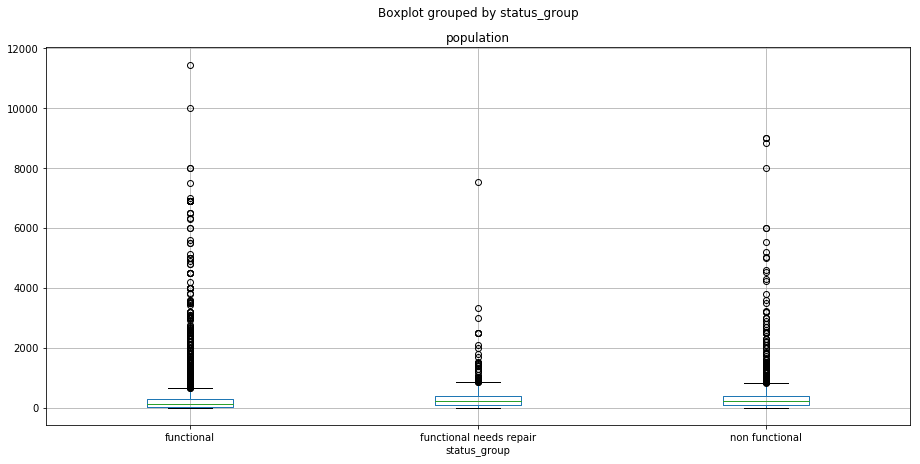

In [98]:
merged.boxplot(column='population', by='status_group', figsize=(15,7))

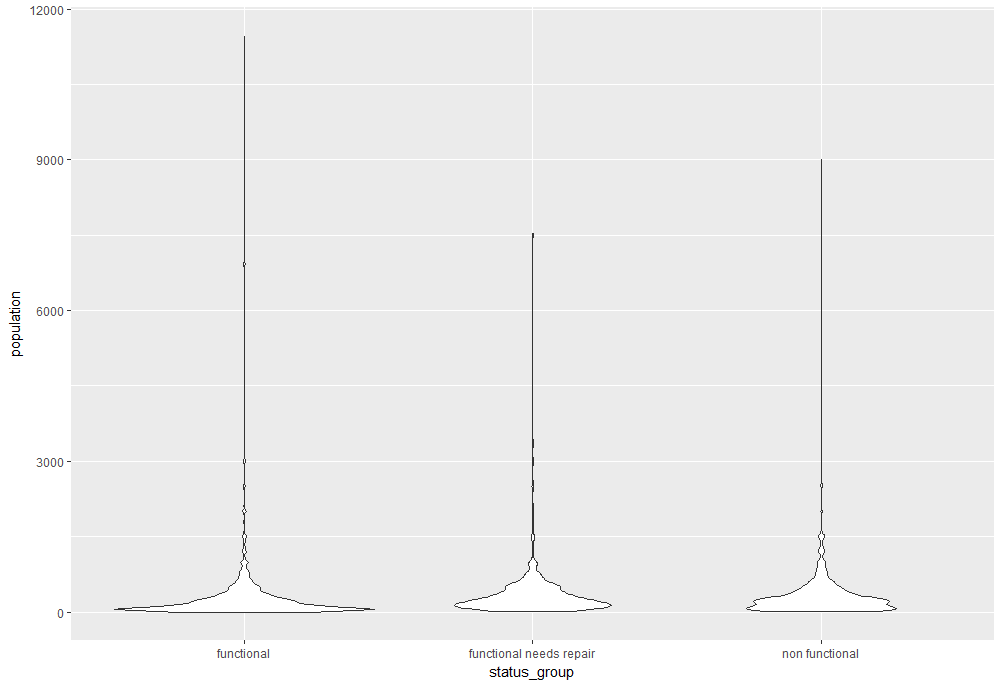

In [99]:
from IPython.display import Image
Image("C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\violin_plot.png")

#R code for plot:
#library(ggplot2)
#merged = read.csv('merged.csv')
#ggplot(merged, aes(x=status_group, y=population)) + geom_violin()

#### Interestingly, it doesn't appear that population is related to pump functionality.

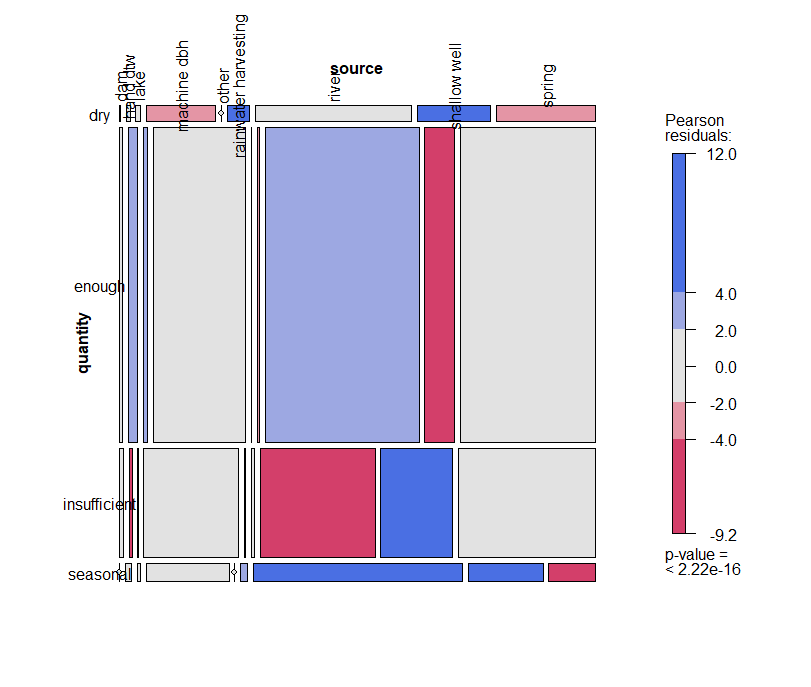

In [100]:
from IPython.display import Image
Image("C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\mosaic_plot.png")

#R code for plot:
##create a contingency table for the two nominal variables you want to compare:
#mytable <- with(merged, table(quantity, source))
#library(vcd)
#mosaic(mytable, shade=TRUE, legend=TRUE, rot_labels=c(90,90,0,0) )

#### This mosaic plot shows us that several values of `quantity` and `source` that occur together than we would expect if the features where completely independent. for instance, we can see that shallow wells are significantly likely to have an insufficient water quantity, which makes sense. Rivers are significantly likely to not have an insufficient water source, which also makes sense. Though these features will fail the assumption of independence that we find in Naive Bayes, we expect that our ensemble which will include a Decision Tree can make up for this failing, since the dependencies are inherently built into decision trees.

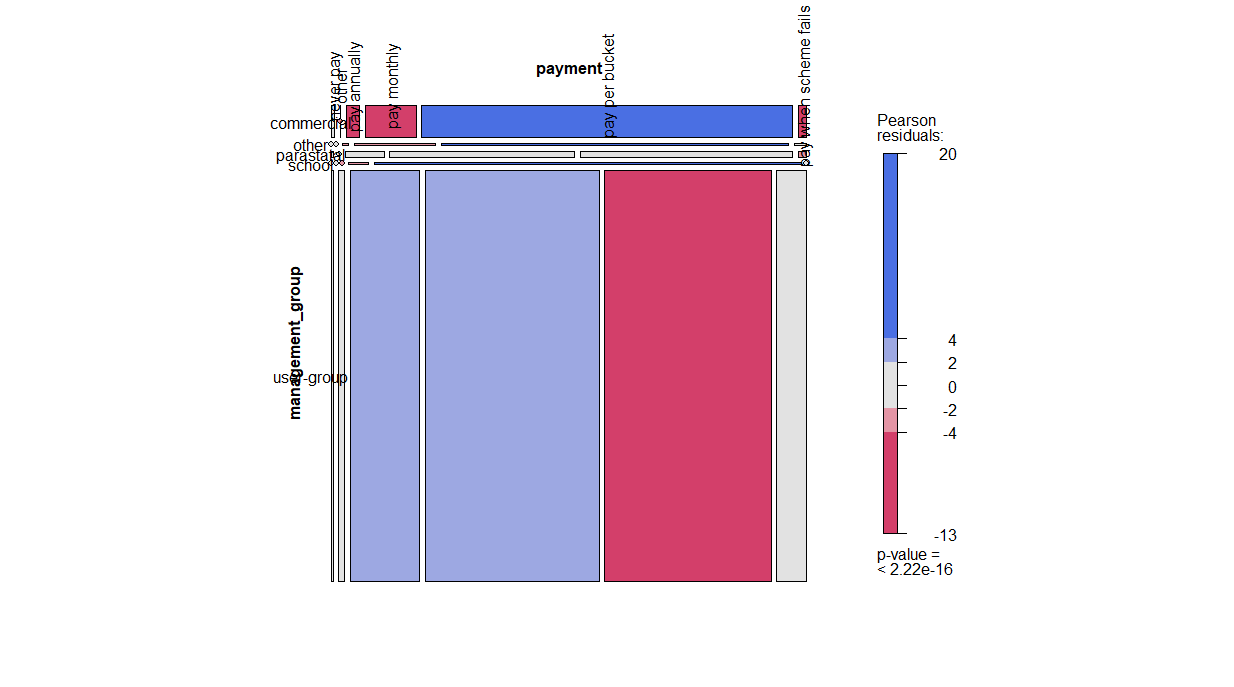

In [101]:
from IPython.display import Image
Image("C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\management_payment.png")

#R code for plot:
##create a contingency table for the two nominal variables you want to compare:
#mytable <- with(merged, table(management_group, payment))
#library(vcd)
#mosaic(mytable, shade=TRUE, legend=TRUE, rot_labels=c(90,90,0,0) )

#### `management_group` and `payment` are also clearly not independent, as we can see that there is a strong positive relationship between commercial management and the pay-per-bucket scheme, and a strong negative relationship between user-group management and the pay-per-bucket scheme.

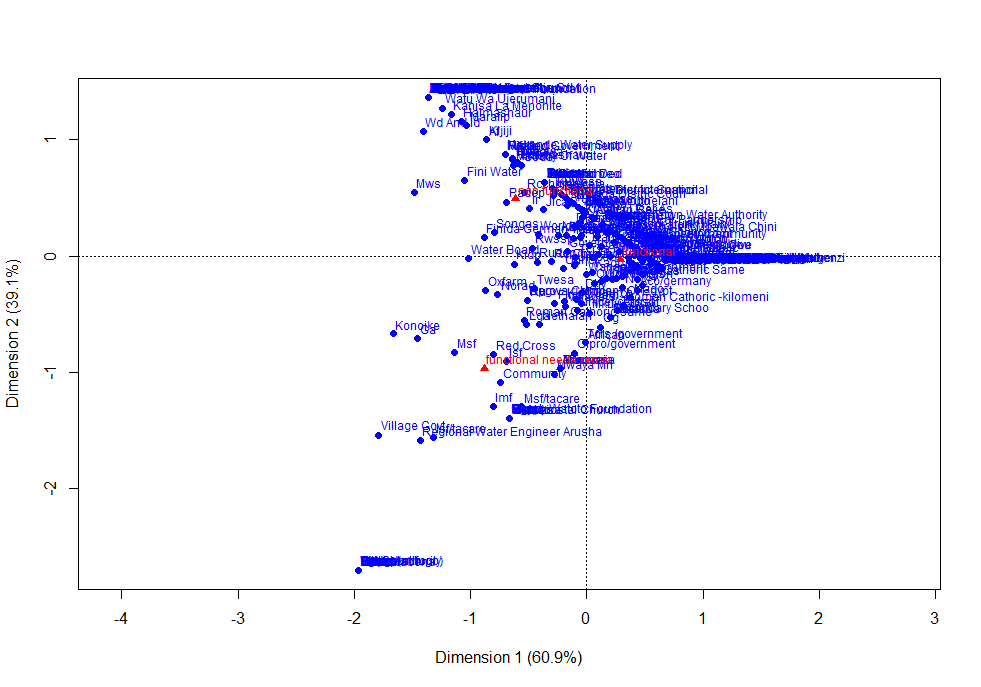

In [102]:
from IPython.display import Image
Image("C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\funder_statusgroup.png")

#R code for plot:
##create a contingency table for the two nominal variables you want to compare:
#mytable <- with(merged, table(funder, status_group))
#library(ca)
#fit = ca(mytable)
#plot(fit)

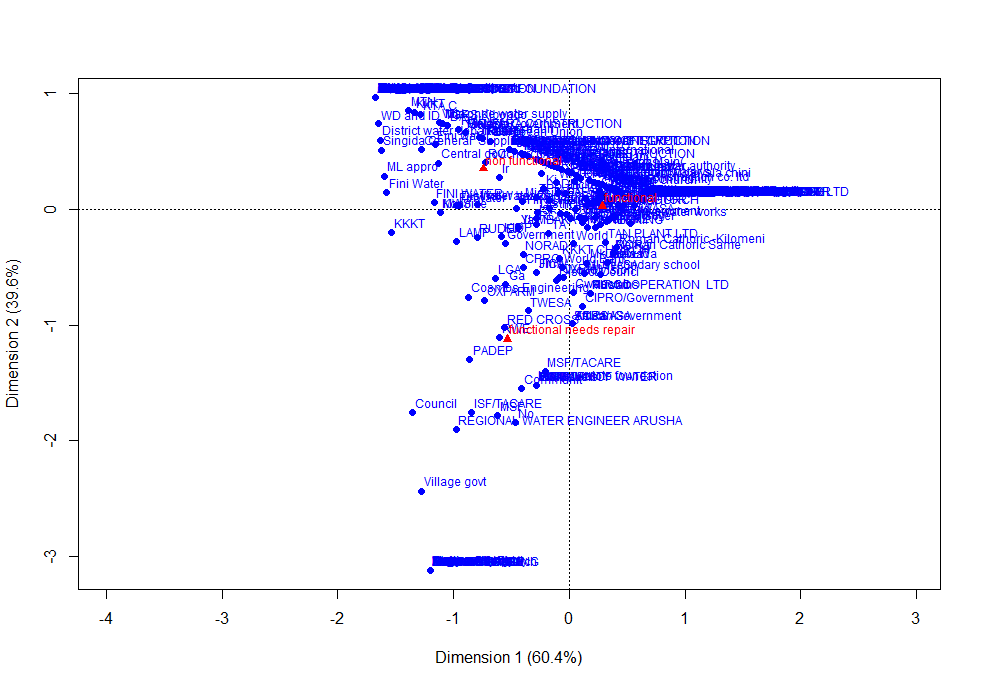

In [103]:
from IPython.display import Image
Image("C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\installer_statusgroup.png")

#R code for plot:
##create a contingency table for the two nominal variables you want to compare:
#mytable <- with(merged, table(installer, status_group))
#library(ca)
#fit = ca(mytable)
#plot(fit)

#### Correspondence Analysis (CA) is a technique that computes dimensions of variance, similarly to PCA, but for categorical values of variables. From the CA plots of `funder` and the target variable, as well as `installer` and the target variable, it is clear there are some relationships that could be predictive. The CA plots can be read by drawing a line between a red point and the origin, drawing a perpendicular line from it to a blue point, and measuring the distance along the first line from the perpendicular intersection to the red point. Smaller distances imply stronger, positive relationships, and further distances opposite the origin imply stronger negative relationships.

# 4. Feature Selection:
#### Instead of dropping 'installer' and 'funder', which have a high degree of cardinality, we can leave them in and use a Chi2 test to pick the optimal percentage of most important features, and select them. We use the Chi2 test because we are looking for relationships between features which are majority categorical and a categorical target feature. Also note that the 10-Fold Cross Validation being done is using stratified sampling of the target class, which is important because we have an uneven distribution of classes.

In [6]:
from sklearn import feature_selection
from sklearn import cross_validation
import scipy.stats as stats
import statsmodels.stats.api as sms

########################################################################
def find_classifier_feature_percentage(data, target, classifier_object, classifier, kfolds=10, percentiles = range(1, 100, 5)):
    mean_scores = []
    cv_scores = {} 
    percentile_counter = 0 #intialize a counter 
    
    print("percentile | accuracy:")
    for percentile in percentiles:
        fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=percentile)
        data_fs = fs.fit_transform(data, target)
        scores = cross_validation.cross_val_score(classifier_object, data_fs, target, cv=kfolds)
        #NOTE: from the documentation for the cv parameter: For integer/None inputs, if the estimator is a classifier and y 
        #is either binary or multiclass, StratifiedKFold is used.
        #NOTE: by default, cross_val_scores are the scores of whatever estimator you are using. 
        print (percentile, scores.mean())
        mean_scores = np.append(mean_scores, scores.mean())
        
        #add the list of scores to the dictionary
        cv_scores[percentile_counter] = scores
        percentile_counter+=1
    
    #find the optimal percentile of features:
    optimal_index = np.where(mean_scores == mean_scores.max())[0]

    optimal_percentile = np.array(percentiles)[optimal_index]
    print("Optimal percentile of features:{0}".format(optimal_percentile, "\n"))
    
    #find the optimal number of features:
    optimal_number = data.shape[1] * (optimal_percentile/100)
    print("Optimal number of features:{0}".format(optimal_number, "\n"))
    
    #compute the ANOVA F-value for the CV scores:
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('ANOVA F-value for the all the percentile\'s CV scores:')
    print(stats.f_oneway(*cv_scores.values()))
    print('-------------------------------------------------------------------------------------')
    
    
    #compute the confidence interval for the highest accuracy:
    best_scores = cv_scores[int(optimal_index)]
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('95% Confidence Interval for the highest accuracy score:')
    print(sms.DescrStatsW(best_scores).tconfint_mean())
    print('-------------------------------------------------------------------------------------')
    print('\n')

    # Plot percentile of features VS. cross-validation scores
    import pylab as pl
    pl.figure()
    pl.title("percentile of features vs. {} cross-validation accuracy".format(classifier))
    pl.ylabel("Cross validation accuracy")        
    pl.xlabel("Percentage of features selected")
    pl.plot(percentiles, mean_scores)
    
    return cv_scores


########################################################################    
def select_kbest_features(data_array, dataframe, target_array, kfeatures):
    #initialize the feature selector:
    selector = feature_selection.SelectKBest(feature_selection.chi2, k=kfeatures)

    #fit the selector to your data:
    selector.fit(data_array, target_array) #note you don't have to assign this to a variable, it is changed in-place

    #get indices of columns to keep:
    idxs_selected = selector.get_support(indices=True)

    #create new array with only k best features:
    kbest_array = data_array[:, idxs_selected]
    
    #create an array with the names of the features selected:
    features_selected = dataframe.columns[idxs_selected]
    
    return features_selected, kbest_array, idxs_selected

In [22]:
#import clean data:
minmax_train_target_df = pd.read_csv('minmax_train_target_df.csv')

#split features and target:
minmax_train_df = minmax_train_target_df[minmax_train_target_df.columns[:-1]]
class_train_df = minmax_train_target_df[minmax_train_target_df.columns[-1:]]

#create a feature set that excludes the non-binary data:
binary_minmax_train_df = minmax_train_df[minmax_train_df.columns[-1270:]] #excludes the first 6 columns (which are non-binary)

#create numpy arrays:
minmax_train = np.array(minmax_train_df)
class_train = np.array(class_train_df)
binary_minmax_train = np.array(binary_minmax_train_df)

#reshape the target array for cross validation in scikit-learn:
cols, rows = class_train.shape
class_train = class_train.reshape(cols,)

print(class_train[:5])
print(minmax_train.shape)
print(class_train.shape)
print(binary_minmax_train.shape)

['non functional' 'functional' 'functional' 'functional' 'non functional']
(7765, 1276)
(7765,)
(7765, 1270)


## Bernoulli NB:

percentile | accuracy:
1 0.734965795383
6 0.667220217391
11 0.660526483037
16 0.660140051377
21 0.662973114
26 0.658593988758
31 0.662071382989
36 0.663358882256
41 0.66297278187
46 0.664003544711
51 0.660656510827
56 0.660012013795
61 0.65859531642
66 0.656535283823
71 0.656277219307
76 0.656276887605
81 0.657047095601
86 0.657047261024
91 0.660008194094
96 0.661553426175
Optimal percentile of features:[1]
Optimal number of features:[ 12.76]


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=13.664192006882326, pvalue=8.039099847731049e-26)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.72817389675656341, 0.74175769401041158)
---------------------------------------------------------------

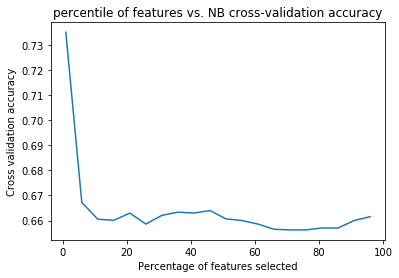

In [9]:
from sklearn import neighbors, tree, naive_bayes
NB = naive_bayes.BernoulliNB()

cv_scores = find_classifier_feature_percentage(minmax_train, class_train, NB, classifier= "NB", percentiles = range(1, 100, 5))

#### Since Bernoulli is designed to work on binary data, we will try it with non-binary data removed:

percentile | accuracy:
1 0.734965795383
6 0.667605653518
11 0.660268916501
16 0.660011019119
21 0.662328616968
26 0.657950820244
31 0.661555918216
36 0.663230182128
41 0.662844247592
46 0.664003544711
51 0.66039911057
56 0.660140713924
61 0.658079851646
66 0.656406251565
71 0.656277219307
76 0.656277053456
81 0.656274894829
86 0.656918560895
91 0.659879660244
96 0.661295860067
Optimal percentile of features:[1]
Optimal number of features:[ 12.7]


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=13.933291736503371, pvalue=3.0337637137238884e-26)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.72817389675656341, 0.74175769401041158)
-----------------------------------------------------------

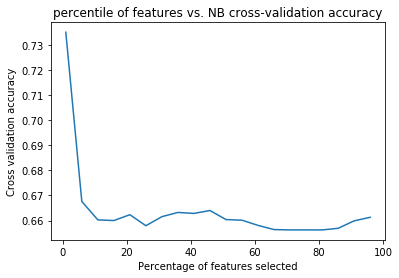

In [25]:
from sklearn import neighbors, tree, naive_bayes
NB = naive_bayes.BernoulliNB()

cv_scores = find_classifier_feature_percentage(binary_minmax_train, class_train, NB, classifier= "NB", 
                                               percentiles = range(1, 100, 5))

#### The results appear to be the same whether the Bernoulli model is fed binary data or a mix of continuous and binary data.

In [28]:
#create an array of the kbest features for NB:
Bern_NB_features_selected, Bern_NB_kbest_features, Bern_NB_idxs_selected = select_kbest_features(minmax_train, minmax_train_df, 
                                                                                                 class_train, 12)
Bern_NB_kbest_features.shape

(7765, 12)

In [29]:
Bern_NB_features_selected

Index(['funder_Isf', 'funder_Norad', 'installer_RWE', 'basin_Lake Tanganyika',
       'region_Kigoma', 'lga_Kigoma Rural',
       'scheme_management_Water authority', 'extraction_type_class_other',
       'payment_pay monthly', 'quantity_dry',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_other'],
      dtype='object')

In [30]:
#export features selected for future use
np.savetxt('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\Bern_NB_features_selected.csv', 
           Bern_NB_idxs_selected, fmt='%d', delimiter=',', newline='\n', header='', footer='')

## Guassian NB:

percentile | accuracy:
1 0.72286366646
6 0.344747565633
11 0.390346925599
16 0.418292121258
21 0.421896058275
26 0.387114643267
31 0.365477744123
36 0.40720896394
41 0.418927981642
46 0.435796330013
51 0.394962191395
56 0.316157039837
61 0.283318752811
66 0.270570466637
71 0.254475313287
76 0.249968484305
81 0.249968484305
86 0.249839452046
91 0.249839452046
96 0.249839452046
Optimal percentile of features:[1]
Optimal number of features:[ 12.76]


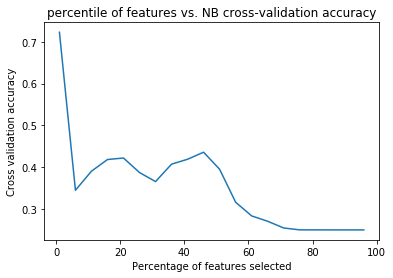

In [111]:
from sklearn import neighbors, tree, naive_bayes
NB = naive_bayes.GaussianNB()

find_classifier_feature_percentage(minmax_train, class_train, NB, classifier= "NB", percentiles = range(1, 100, 5))

percentile | accuracy:
0.1 0.678858845876
0.6 0.673316109259
1.1 0.724279533726
1.6 0.723121066717
2.1 0.177084537195
2.6 0.180562261416
3.1 0.249973306814
3.6 0.270065634712
4.1 0.321578228021
4.6 0.318608492882
5.1 0.317449527465
5.6 0.317706595165
6.1 0.344100577417
6.6 0.357117888804
7.1 0.364716510039
7.6 0.371799665217
8.1 0.36343033929
8.6 0.378498877779
9.1 0.375793683892
9.6 0.377598143157
Optimal percentile of features:[ 1.1]
Optimal number of features:[ 14.036]


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=66.754275593611638, pvalue=5.4373837202585459e-71)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.71361352108138987, 0.73494554637125931)
--------------------------------

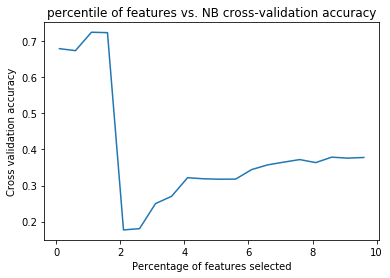

In [232]:
from sklearn import neighbors, tree, naive_bayes
NB = naive_bayes.GaussianNB()

find_classifier_feature_percentage(minmax_train, class_train, NB, classifier= "NB", percentiles = np.arange(.1, 10, .5))

In [5]:
#create an array of the kbest features for NB:
NB_features_selected, NB_kbest_features, NB_idxs_selected = select_kbest_features(minmax_train, minmax_train_df, class_train, 14)
NB_kbest_features.shape

(7765, 14)

In [115]:
NB_features_selected

Index(['funder_Isf', 'funder_Norad', 'installer_RWE', 'basin_Lake Tanganyika', 'region_Kigoma', 'lga_Kigoma Rural', 'scheme_management_Water authority', 'extraction_type_class_gravity', 'extraction_type_class_other', 'payment_pay monthly', 'quantity_dry', 'quantity_enough', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_other'], dtype='object')

In [7]:
#export features selected for future use
np.savetxt('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\NB_features_selected.csv', 
           NB_idxs_selected, fmt='%d', delimiter=',', newline='\n', header='', footer='')

## Decision Trees:

percentile | accuracy:
1 0.774117695561
6 0.777207493326
11 0.78325905427
16 0.786865813317
21 0.787251083165
26 0.787637350258
31 0.78828085133
36 0.788924518252
41 0.787251748708
46 0.786221317141
51 0.786739605228
56 0.783522269145
61 0.784294968326
66 0.784165769789
71 0.783651467682
76 0.78287876893
81 0.78390886794
86 0.783007801188
91 0.784423335897
96 0.783650803424
Optimal percentile of features:[36]
Optimal number of features:[ 459.36]


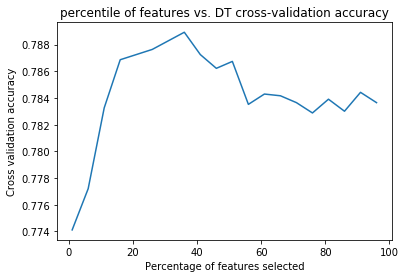

In [116]:
from sklearn import neighbors, tree, naive_bayes
DT = tree.DecisionTreeClassifier(criterion='gini', max_depth= 20, min_samples_split=50)

find_classifier_feature_percentage(minmax_train, class_train, DT, classifier= "DT")

percentile | accuracy:
1 0.774117695561
2 0.776049359303
3 0.776949928074
4 0.779269351992
5 0.777594921374
6 0.777851325671
7 0.778623693578
8 0.781586121444
9 0.783385595344
10 0.782870961108
11 0.784160785281
12 0.784161449967
13 0.78493331861
14 0.788022951808
Optimal percentile of features:[14]
Optimal number of features:[ 178.64]


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=2.3998324518626561, pvalue=0.0064254503552349995)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.78235827461213703, 0.7936876290044349)
-------------------------------------------------------------------------------------




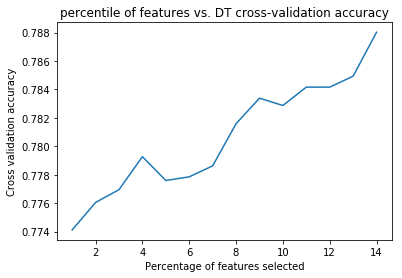

In [234]:
from sklearn import neighbors, tree, naive_bayes
DT = tree.DecisionTreeClassifier(criterion='gini', max_depth= 20, min_samples_split=50)

cv_scores = find_classifier_feature_percentage(minmax_train, class_train, DT, classifier= "DT", percentiles = np.arange(1, 15, 1))

#### It seems that the accuracy is around 78% for all models between 8% to 100% of features, so we can choose the smallest percentile of features to satisfy the Minimum Description Length mantra. 

In [235]:
#find the confidence interval for the 8th percentile:
sms.DescrStatsW(cv_scores[7]).tconfint_mean()

(0.77584869914497656, 0.78732354374259705)

In [124]:
#find the optimal number of features:
minmax_train.shape[1] * (8/100)

102.08

In [22]:
#create an array of the kbest features for DT:
DT_features_selected, DT_kbest_features, DT_idxs_selected = select_kbest_features(minmax_train, minmax_train_df, class_train, 102)
DT_kbest_features.shape

(7765, 102)

In [23]:
#export features selected for future use
np.savetxt('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\DT_features_selected.csv', 
           DT_idxs_selected, fmt='%d', delimiter=',', newline='\n', header='', footer='')

In [128]:
for feature in DT_features_selected:
    print(feature)

longitude
funder_0
funder_Ces (gmbh)
funder_Ces(gmbh)
funder_Community
funder_Ga
funder_Germany Republi
funder_Government Of Tanzania
funder_Imf
funder_Isf
funder_Lga
funder_Ministry Of Water
funder_Norad
funder_Oxfam
funder_Peace Cope
funder_Private Individual
funder_Rc Church
funder_W.B
funder_Watu Wa Ujerumani
funder_World Bank
installer_0
installer_ACRA
installer_CES
installer_Canop
installer_Central govt
installer_Communit
installer_DA
installer_Dmdd
installer_Government
installer_LGA
installer_MSF
installer_MTN
installer_NORAD
installer_OXFAM
installer_RWE
installer_RWE/DWE
installer_WD and ID
basin_Internal
basin_Lake Nyasa
basin_Lake Tanganyika
basin_Lake Victoria
basin_Pangani
basin_Rufiji
basin_Ruvuma / Southern Coast
basin_Wami / Ruvu
region_Arusha
region_Dar es Salaam
region_Iringa
region_Kigoma
region_Kilimanjaro
region_Lindi
region_Mara
region_Pwani
region_Tanga
lga_Bagamoyo
lga_Bunda
lga_Hai
lga_Karatu
lga_Kasulu
lga_Kibondo
lga_Kigoma Rural
lga_Kilombero
lga_Kiteto
lga_

## KNN:

percentile | accuracy:
1 0.770253038277
6 0.777851658657
11 0.777722297265
16 0.779912191373
21 0.778365963331
26 0.7796537943
31 0.779913519035
36 0.779913353184
41 0.779011954303
46 0.779913187333
51 0.781588613912
56 0.782746914214
61 0.782618214086
66 0.782489181828
71 0.782103081441
76 0.781458916967
81 0.780814419936
86 0.780557351808
91 0.780557351808
96 0.780557351808
Optimal percentile of features:[56]
Optimal number of features:[ 714.56]


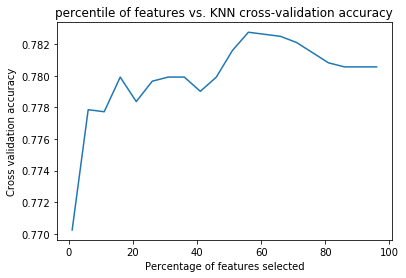

In [129]:
from sklearn import neighbors, tree, naive_bayes
KNN = neighbors.KNeighborsClassifier(n_neighbors=10, metric='minkowski', weights='distance') # weight points by the inverse of their distance

find_classifier_feature_percentage(minmax_train, class_train, KNN, classifier= "KNN")#, percentiles = np.arange(1, 15, 1))

percentile | accuracy:
1 0.770381572127
6 0.788927340282
11 0.782360314992
16 0.784808440751
21 0.785965745949
26 0.784678411249
31 0.786740104492
36 0.7868689709
41 0.787254738728
46 0.789700539582
51 0.789313941216
56 0.787895416914
61 0.787122884013
66 0.786350185261
71 0.786350351539
76 0.785964583283
81 0.785835384746
86 0.78544928436
91 0.78544928436
96 0.78544928436
Optimal percentile of features:[46]
Optimal number of features:[ 586.96]


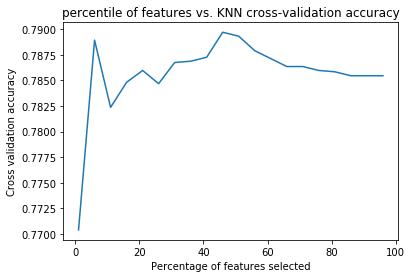

In [133]:
from sklearn import neighbors, tree, naive_bayes
KNN = neighbors.KNeighborsClassifier(n_neighbors=10, metric='jaccard', weights='distance') # weight points by the inverse of their distance
#the jaccard distance is for boolean (T/F, 1/0) data

find_classifier_feature_percentage(minmax_train, class_train, KNN, classifier= "KNN")#, percentiles = np.arange(1, 15, 1))

#### The Jaccard distance is a measure of dissimilarity that is well suited for binary variables, and since the vast majority of the features are binary dummy variables, it seems a better choice than a distance metric only suited for continuous data.

percentile | accuracy:
1 0.770381572127
2 0.777341174968
3 0.78480860489
4 0.77772628025
5 0.782100754824
6 0.788927340282
7 0.789958269829
8 0.789056870948
9 0.785578647891
Optimal percentile of features:[7]
Optimal number of features:[ 89.32]


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=4.8077129821769606, pvalue=7.3033117180699338e-05)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.7835176429685814, 0.79639889668856367)
-------------------------------------------------------------------------------------




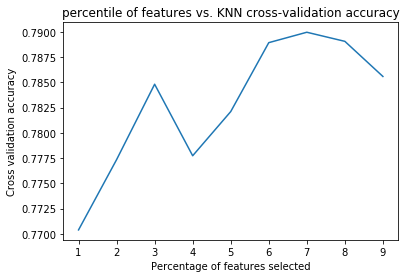

In [21]:
from sklearn import neighbors, tree, naive_bayes
KNN = neighbors.KNeighborsClassifier(n_neighbors=10, metric='jaccard', weights='distance') # weight points by the inverse of their distance
#the jaccard distance is for boolean (T/F, 1/0) data

cv_scores = find_classifier_feature_percentage(minmax_train, class_train, KNN, classifier= "KNN", percentiles = np.arange(1, 10, 1))

In [22]:
#find the confidence interval for the 7th percentile of CV scores:
sms.DescrStatsW(cv_scores[6]).tconfint_mean()

(0.7835176429685814, 0.79639889668856367)

In [24]:
#create an array of the kbest features for KNN:
KNN_features_selected, KNN_kbest_features, KNN_idxs_selected = select_kbest_features(minmax_train, minmax_train_df, class_train, 89)
KNN_kbest_features.shape

(7765, 89)

In [25]:
#export features selected for future use
np.savetxt('C:\\Users\\Renel\\Documents\\School\\DePaul\\5. Fall 2017\\CSC 529\\CS1\\KNN_features_selected.csv', 
           KNN_idxs_selected, fmt='%d', delimiter=',', newline='\n', header='', footer='')

In [40]:
KNN_features_selected

Index(['longitude', 'funder_Ces (gmbh)', 'funder_Ces(gmbh)',
       'funder_Community', 'funder_Ga', 'funder_Germany Republi', 'funder_Isf',
       'funder_Lga', 'funder_Ministry Of Water', 'funder_Norad',
       'funder_Peace Cope', 'funder_Private Individual', 'funder_Rc Church',
       'funder_W.B', 'funder_Watu Wa Ujerumani', 'funder_World Bank',
       'installer_ACRA', 'installer_CES', 'installer_Canop',
       'installer_Central govt', 'installer_Communit', 'installer_DA',
       'installer_Dmdd', 'installer_Government', 'installer_LGA',
       'installer_MSF', 'installer_MTN', 'installer_NORAD', 'installer_OXFAM',
       'installer_RWE', 'installer_RWE/DWE', 'installer_WD and ID',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Tanganyika',
       'basin_Lake Victoria', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
       'basin_Wami / Ruvu', 'region_Arusha', 'region_Iringa', 'region_Kigoma',
       'region_Kilimanjaro', 'region_Lindi', 'region_Mara', 'region_Pwani'

# Parameter Tuning

In [3]:
#import clean data:
minmax_validation_target_df = pd.read_csv('minmax_validation_target_df.csv')


#split features and target:
minmax_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[:-1]]
class_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[-1:]]


#create numpy arrays:
minmax_validation = np.array(minmax_validation_df)
class_validation = np.array(class_validation_df)


#reshape the target array for cross validation in scikit-learn:
cols, rows = class_validation.shape
class_validation = class_validation.reshape(cols,)


#import and reshape feature sets for indexing: 
DT_features_selected = np.array(pd.read_csv('DT_features_selected.csv', header=None))
DT_features_selected = DT_features_selected.reshape(1,DT_features_selected.shape[0])
DT_features_selected = DT_features_selected[0]

NB_features_selected = np.array(pd.read_csv('NB_features_selected.csv', header=None))
NB_features_selected = NB_features_selected.reshape(1,NB_features_selected.shape[0])
NB_features_selected = NB_features_selected[0]

KNN_features_selected = np.array(pd.read_csv('KNN_features_selected.csv', header=None))
KNN_features_selected = KNN_features_selected.reshape(1,KNN_features_selected.shape[0])
KNN_features_selected = KNN_features_selected[0]


#slice dataframes by feature sets:
DT_minmax_validation = minmax_validation[:, DT_features_selected]
NB_minmax_validation = minmax_validation[:, NB_features_selected]
KNN_minmax_validation = minmax_validation[:, KNN_features_selected]


print(DT_minmax_validation.shape)
print(NB_minmax_validation.shape)
print(KNN_minmax_validation.shape)
print('\n')
print(class_validation[:5], '\n')
print(class_validation.shape)

(2588, 102)
(2588, 14)
(2588, 89)


['functional needs repair' 'non functional' 'functional' 'functional'
 'functional'] 

(2588,)


## Decision Tree Parameters:

In [94]:
from sklearn import cross_validation
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn import neighbors, tree, naive_bayes

########################################################################
def find_DT_parameters(data, target, kfolds=10, max_depth_range = range(10, 30, 5), min_samples_split_range = range(50, 200, 50)):
    mean_scores = []
    cv_scores = {} 
    counter = 0 
    results = pd.DataFrame(columns=['max_depth', 'min_samples_split', 'average CV accuracy'])

    for i_max_depth in max_depth_range:
        for i_min_samples_split in min_samples_split_range:
            #create the classifier object:
            DT = tree.DecisionTreeClassifier(criterion='gini', max_depth=i_max_depth, min_samples_split=i_min_samples_split)
            #perform k-fold CV and compute accuracy scores:
            scores = cross_validation.cross_val_score(DT, data, target, cv=kfolds)
            
            #append the results to a dataframe:
            results.loc[counter] = [i_max_depth, i_min_samples_split, scores.mean()]
            
            #add the list of scores to the dictionary:
            cv_scores[counter] = scores
            
            #add the mean accuracy to an array:
            mean_scores = np.append(mean_scores, scores.mean())
            
            counter+=1
    
    #find the optimal schema:
    optimal_index = np.where(mean_scores == mean_scores.max())[0]
    print("Optimal schema:")
    print(results.loc[optimal_index])
    
    #compute the ANOVA F-value for the CV scores:
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('ANOVA F-value for the all the schema\'s CV scores:')
    print(stats.f_oneway(*cv_scores.values()))
    print('-------------------------------------------------------------------------------------')
    
    #compute the confidence interval for the highest accuracy:
    best_scores = cv_scores[int(optimal_index)]
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('95% Confidence Interval for the highest accuracy score:')
    print(sms.DescrStatsW(best_scores).tconfint_mean())
    print('-------------------------------------------------------------------------------------')
    print('\n')
    
    return results, cv_scores

In [91]:
results, cv_scores = find_DT_parameters(DT_minmax_validation, class_validation, kfolds=10, max_depth_range = range(5, 50, 5), 
                                        min_samples_split_range = range(25, 200, 25))

Optimal schema:
   max_depth  min_samples_split_range  average CV accuracy
7       10.0                     25.0             0.774377


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=0.45859073570084097, pvalue=0.99987597900751757)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.75889335441554728, 0.78986094313252442)
-------------------------------------------------------------------------------------




In [92]:
results, cv_scores = find_DT_parameters(DT_minmax_validation, class_validation, kfolds=10, max_depth_range = range(5, 10, 5), 
                                        min_samples_split_range = range(5, 35, 5))

Optimal schema:
   max_depth  min_samples_split_range  average CV accuracy
5        5.0                     30.0             0.763164


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=0.040460574610303453, pvalue=0.9990313205689022)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.74956397839027611, 0.77676327202257722)
-------------------------------------------------------------------------------------




In [95]:
results, cv_scores = find_DT_parameters(DT_minmax_validation, class_validation, kfolds=10, max_depth_range = range(1, 8, 1), 
                                        min_samples_split_range = range(5, 35, 5))

Optimal schema:
    max_depth  min_samples_split  average CV accuracy
38        7.0               15.0             0.768946


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=5.1182059627213263, pvalue=1.6636700964892584e-18)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.7594043209586403, 0.77848798234222327)
-------------------------------------------------------------------------------------




## KNN Parameters:

In [4]:
from sklearn import cross_validation
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn import neighbors, tree, naive_bayes

########################################################################
def find_KNN_parameters(data, target, kfolds=10, n_neighbors_range=range(3, 20, 1)):
    mean_scores = []
    cv_scores = {} 
    counter = 0 
    results = pd.DataFrame(columns=['n_neighbors', 'weights', 'average CV accuracy'])
    
    # NOTE: The jaccard distance is for boolean (T/F, 1/0) data. weights='distance' weights points by the inverse of their 
    # distance. weights='uniform' uses equal voting to classify a neighbor.
    
    for i_n_neighbors in n_neighbors_range:
        #create the classifier object:
        KNN = neighbors.KNeighborsClassifier(n_neighbors=i_n_neighbors, metric='jaccard', weights='distance')
        #perform k-fold CV and compute accuracy scores:
        scores = cross_validation.cross_val_score(KNN, data, target, cv=kfolds)
        #append the results to a dataframe:
        results.loc[counter] = [i_n_neighbors, 'distance', scores.mean()]
        #add the list of scores to the dictionary:
        cv_scores[counter] = scores
        #add the mean accuracy to an array:
        mean_scores = np.append(mean_scores, scores.mean())
        
        counter+=1
        
        #create the classifier object:
        KNN = neighbors.KNeighborsClassifier(n_neighbors=i_n_neighbors, metric='jaccard', weights='uniform')
        #perform k-fold CV and compute accuracy scores:
        scores = cross_validation.cross_val_score(KNN, data, target, cv=kfolds)
        #append the results to a dataframe:
        results.loc[counter] = [i_n_neighbors, 'uniform', scores.mean()]
        #add the list of scores to the dictionary:
        cv_scores[counter] = scores
        #add the mean accuracy to an array:
        mean_scores = np.append(mean_scores, scores.mean())

        counter+=1
    
    #find the optimal schema:
    optimal_index = np.where(mean_scores == mean_scores.max())[0]
    print("Optimal schema:")
    print(results.loc[optimal_index])
    
    #compute the ANOVA F-value for the CV scores:
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('ANOVA F-value for the all the schema\'s CV scores:')
    print(stats.f_oneway(*cv_scores.values()))
    print('-------------------------------------------------------------------------------------')
    
    #compute the confidence interval for the highest accuracy:
    best_scores = cv_scores[int(optimal_index)]
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('95% Confidence Interval for the highest accuracy score:')
    print(sms.DescrStatsW(best_scores).tconfint_mean())
    print('-------------------------------------------------------------------------------------')
    print('\n')
    
    return results, cv_scores

C:\Users\Renel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Renel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [98]:
results, cv_scores = find_KNN_parameters(KNN_minmax_validation, class_validation, kfolds=10, n_neighbors_range=range(3, 20, 1))

Optimal schema:
   n_neighbors   weights  average CV accuracy
22          14  distance             0.767453


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=0.81056012186526782, pvalue=0.76310597913140799)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.75208796687740542, 0.7828172761601333)
-------------------------------------------------------------------------------------




In [99]:
results, cv_scores = find_KNN_parameters(KNN_minmax_validation, class_validation, kfolds=10, n_neighbors_range=range(21, 40, 1))

Optimal schema:
   n_neighbors   weights  average CV accuracy
10          26  distance             0.766676


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=5.1576192886257894, pvalue=4.4964921945571234e-17)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.75215423184512686, 0.78119763030050948)
-------------------------------------------------------------------------------------




In [5]:
results, cv_scores = find_KNN_parameters(KNN_minmax_validation, class_validation, kfolds=10, n_neighbors_range=range(10, 30, 1))

Optimal schema:
  n_neighbors   weights  average CV accuracy
8          14  distance             0.767453


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=2.0738008255995908, pvalue=0.00030259823681448486)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.75208796687740542, 0.7828172761601333)
-------------------------------------------------------------------------------------




## Stacked Ensemble with simple voting:

In [4]:
#import clean training data:
minmax_train_target_df = pd.read_csv('minmax_train_target_df.csv')

#split features and target:
minmax_train_df = minmax_train_target_df[minmax_train_target_df.columns[:-1]]
class_train_df = minmax_train_target_df[minmax_train_target_df.columns[-1:]]

#create numpy arrays:
minmax_train = np.array(minmax_train_df)
class_train = np.array(class_train_df)

#reshape the target array for cross validation in scikit-learn:
cols, rows = class_train.shape
class_train = class_train.reshape(cols,)    

In [5]:
from sklearn import tree
#create classifier object:
DT = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=15)

from sklearn import naive_bayes
#create classifier object:
Bern_NB = naive_bayes.BernoulliNB()

from sklearn import naive_bayes
#create classifier object:
NB = naive_bayes.GaussianNB()

from sklearn import neighbors
#create classifier object:
KNN = neighbors.KNeighborsClassifier(n_neighbors=14, metric='jaccard', weights='distance')

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline


#create the feature selecting object:
sfs_DT = SequentialFeatureSelector(DT, 
                                 k_features=102,
                                 forward=True, 
                                 floating=False, 
                                 scoring='accuracy',
                                 verbose=0,
                                 cv=0)

#create the pipeline object that hands the feature selector to the ensemble method:
DT_pipe = Pipeline([('sfs_DT', sfs_DT),
                    ('DT', DT)])

In [13]:
from mlxtend.classifier import EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[DT_pipe, Bern_NB, NB], 
                              voting='soft')

In [14]:
ensemble = ensemble.fit(minmax_train, class_train)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

#### Area for improvement: using a feature selection that is based on the performance of the model (e.g. forward or backward selection) instead of a Chi2 which will return the same data subsets for each algorithm to use. Different algorithms exploit different features and thus should receive a subset of data that maximizes the subsequent model’s performance. However, when I tried forward selection on for DTs on all 1,276 variables, it took an extraordinary amount of time and thus would best be suited for a parallel computing setup.

In [139]:
from sklearn.ensemble import VotingClassifier
#create ensemble objects:
ensemble_hard = VotingClassifier(estimators=[('DT', DT), ('Bern_NB', Bern_NB), ('NB', NB), ('KNN', KNN)], voting='hard')
ensemble_soft = VotingClassifier(estimators=[('DT', DT), ('Bern_NB', Bern_NB), ('NB', NB), ('KNN', KNN)], voting='soft')

In [155]:
from sklearn import feature_selection
from sklearn import cross_validation
import scipy.stats as stats
import statsmodels.stats.api as sms

########################################################################
def find_ensemble_feature_percentage(data, target, classifier_object, classifier, kfolds=10, percentiles = range(1, 100, 5)):
    mean_scores = []
    cv_scores = {} 
    percentile_counter = 0 #intialize a counter
    results = pd.DataFrame(columns=['classifier', 'percentile', 'average CV accuracy'])
    
    print("percentile | accuracy:")
    for percentile in percentiles:
        fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=percentile)
        data_fs = fs.fit_transform(data, target)
        scores = cross_validation.cross_val_score(classifier_object, data_fs, target, cv=kfolds)
        #NOTE: from the documentation for the cv parameter: For integer/None inputs, if the estimator is a classifier and y 
        #is either binary or multiclass, StratifiedKFold is used.
        #NOTE: by default, cross_val_scores are the scores of whatever estimator you are using. 
        print (percentile, scores.mean())
        mean_scores = np.append(mean_scores, scores.mean())
        
        #add the list of scores to the dictionary
        cv_scores[percentile_counter] = scores
        
        #add the results to the dataframe:
        results.loc[percentile_counter] = [classifier, percentile, scores.mean()]
        percentile_counter+=1
    
    #find the optimal percentile of features:
    optimal_index = np.where(mean_scores == mean_scores.max())[0]

    optimal_percentile = np.array(percentiles)[optimal_index]
    print("Optimal percentile of features:{0}".format(optimal_percentile, "\n"))
    
    #find the optimal number of features:
    optimal_number = data.shape[1] * (optimal_percentile/100)
    print("Optimal number of features:{0}".format(optimal_number, "\n"))
   
    print("Optimal schema:")
    print(results.loc[optimal_index])
    
    #compute the ANOVA F-value for the CV scores:
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('ANOVA F-value for the all the percentile\'s CV scores:')
    print(stats.f_oneway(*cv_scores.values()))
    print('-------------------------------------------------------------------------------------')
    
    
    #compute the confidence interval for the highest accuracy:
    best_scores = cv_scores[int(optimal_index)]
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('95% Confidence Interval for the highest accuracy score:')
    print(sms.DescrStatsW(best_scores).tconfint_mean())
    print('-------------------------------------------------------------------------------------')
    print('\n')

    # Plot percentile of features VS. cross-validation scores
    import pylab as pl
    pl.figure()
    pl.title("percentile of features vs. {} cross-validation accuracy".format(classifier))
    pl.ylabel("Cross validation accuracy")        
    pl.xlabel("Percentage of features selected")
    pl.plot(percentiles, mean_scores)
    
    return cv_scores, results, optimal_index

percentile | accuracy:
1 0.763815044818
6 0.782359982007
11 0.783262046858
16 0.787640508269
21 0.788284008913
26 0.785450447882
31 0.786610242553
Optimal percentile of features:[21]
Optimal number of features:[ 267.96]
Optimal schema:
    classifier percentile  average CV accuracy
4  hard_voting         21             0.788284


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=6.0957617252306546, pvalue=4.4606837412513023e-05)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.7805134830391921, 0.79605453478622501)
-------------------------------------------------------------------------------------




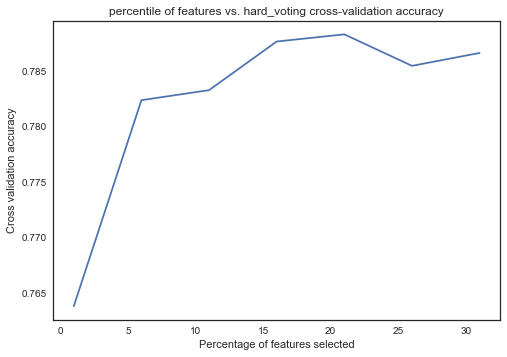

In [156]:
ensemble_hard_cv_scores, ensemble_hard_results, ensemble_hard_optimal_index= find_ensemble_feature_percentage(minmax_train, 
                                                                                                              class_train, 
                                                                                                              ensemble_hard,
                                                                                                              'hard_voting', 
                                                                                                              kfolds=10,
                                                                                                              percentiles=
                                                                                                              range(1, 36, 5))

In [18]:
ensemble_hard_results

,classifier,percentile,average CV accuracy
0,hard_voting,1,0.763815
1,hard_voting,6,0.782103
2,hard_voting,11,0.783262
3,hard_voting,16,0.787641
4,hard_voting,21,0.788155
5,hard_voting,26,0.785579
6,hard_voting,31,0.786610


percentile | accuracy:
1 0.745009386507
6 0.73676294609
11 0.753127788913
16 0.746169181605
21 0.74436472234
26 0.743976627894
31 0.725820946106
36 0.752092207843
Optimal percentile of features:[11]
Optimal number of features:[ 140.36]
Optimal schema:
    classifier percentile  average CV accuracy
2  soft_voting         11             0.753128


-------------------------------------------------------------------------------------
ANOVA F-value for the all the percentile's CV scores:
F_onewayResult(statistic=9.4066343853363215, pvalue=3.1360520817609959e-08)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score:
(0.74612084998431794, 0.76013472784159575)
-------------------------------------------------------------------------------------




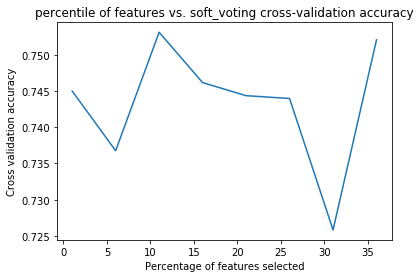

In [19]:
cv_scores, results = find_ensemble_feature_percentage(minmax_train, class_train, ensemble_soft, 'soft_voting', kfolds=10, 
                                             percentiles = range(1, 41, 5))

In [20]:
results

,classifier,percentile,average CV accuracy
0,soft_voting,1,0.745009
1,soft_voting,6,0.736763
2,soft_voting,11,0.753128
3,soft_voting,16,0.746169
4,soft_voting,21,0.744365
5,soft_voting,26,0.743977
6,soft_voting,31,0.725821
7,soft_voting,36,0.752092


## Build Base Models for XGBoost:

In [3]:
#import clean training data:
minmax_train_target_df = pd.read_csv('minmax_train_target_df.csv')

#split features and target:
minmax_train_df = minmax_train_target_df[minmax_train_target_df.columns[:-1]]
class_train_df = minmax_train_target_df[minmax_train_target_df.columns[-1:]]

#create numpy arrays:
minmax_train = np.array(minmax_train_df)
class_train = np.array(class_train_df)

#import and reshape feature sets for indexing: 
DT_features_selected = np.array(pd.read_csv('DT_features_selected.csv', header=None))
DT_features_selected = DT_features_selected.reshape(1,DT_features_selected.shape[0])
DT_features_selected = DT_features_selected[0]

NB_features_selected = np.array(pd.read_csv('NB_features_selected.csv', header=None))
NB_features_selected = NB_features_selected.reshape(1,NB_features_selected.shape[0])
NB_features_selected = NB_features_selected[0]

Bern_NB_features_selected = np.array(pd.read_csv('Bern_NB_features_selected.csv', header=None))
Bern_NB_features_selected = Bern_NB_features_selected.reshape(1,Bern_NB_features_selected.shape[0])
Bern_NB_features_selected = Bern_NB_features_selected[0]

KNN_features_selected = np.array(pd.read_csv('KNN_features_selected.csv', header=None))
KNN_features_selected = KNN_features_selected.reshape(1,KNN_features_selected.shape[0])
KNN_features_selected = KNN_features_selected[0]

#slice dataframes by feature sets:
DT_minmax_train = minmax_train[:, DT_features_selected]
NB_minmax_train = minmax_train[:, NB_features_selected]
Bern_NB_minmax_train = minmax_train[:, Bern_NB_features_selected]
KNN_minmax_train = minmax_train[:, KNN_features_selected]

#reshape the target array for cross validation in scikit-learn:
cols, rows = class_train.shape
class_train = class_train.reshape(cols,)

print(DT_minmax_train.shape)
print(NB_minmax_train.shape)
print(Bern_NB_minmax_train.shape)
print(KNN_minmax_train.shape)

print('\n', class_train[:5])
print(class_train.shape)

(7765, 102)
(7765, 14)
(7765, 12)
(7765, 89)

 ['non functional' 'functional' 'functional' 'functional' 'non functional']
(7765,)


In [4]:
#import clean validation data:
minmax_validation_target_df = pd.read_csv('minmax_validation_target_df.csv')


#split features and target:
minmax_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[:-1]]
class_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[-1:]]


#create numpy arrays:
minmax_validation = np.array(minmax_validation_df)
class_validation = np.array(class_validation_df)


#reshape the target array for cross validation in scikit-learn:
cols, rows = class_validation.shape
class_validation = class_validation.reshape(cols,)


#import and reshape feature sets for indexing: 
DT_features_selected = np.array(pd.read_csv('DT_features_selected.csv', header=None))
DT_features_selected = DT_features_selected.reshape(1,DT_features_selected.shape[0])
DT_features_selected = DT_features_selected[0]

NB_features_selected = np.array(pd.read_csv('NB_features_selected.csv', header=None))
NB_features_selected = NB_features_selected.reshape(1,NB_features_selected.shape[0])
NB_features_selected = NB_features_selected[0]

Bern_NB_features_selected = np.array(pd.read_csv('Bern_NB_features_selected.csv', header=None))
Bern_NB_features_selected = Bern_NB_features_selected.reshape(1,Bern_NB_features_selected.shape[0])
Bern_NB_features_selected = Bern_NB_features_selected[0]

KNN_features_selected = np.array(pd.read_csv('KNN_features_selected.csv', header=None))
KNN_features_selected = KNN_features_selected.reshape(1,KNN_features_selected.shape[0])
KNN_features_selected = KNN_features_selected[0]


#slice dataframes by feature sets:
DT_minmax_validation = minmax_validation[:, DT_features_selected]
NB_minmax_validation = minmax_validation[:, NB_features_selected]
Bern_NB_minmax_validation  = minmax_validation[:, Bern_NB_features_selected]
KNN_minmax_validation = minmax_validation[:, KNN_features_selected]


print(DT_minmax_validation.shape)
print(NB_minmax_validation.shape)
print(Bern_NB_minmax_validation.shape)
print(KNN_minmax_validation.shape)

print('\n', class_validation[:5])
print(class_validation.shape)

(2588, 102)
(2588, 14)
(2588, 12)
(2588, 89)

 ['functional needs repair' 'non functional' 'functional' 'functional'
 'functional']
(2588,)


## Train DT Model:

In [5]:
from sklearn import tree

#create classifier object:
DT = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=15)

#train the model:
DT = DT.fit(DT_minmax_train, class_train)

#get predictions on training set:
DT_preds_train = DT.predict(DT_minmax_train)

#get predictions on validation set:
DT_preds_validation = DT.predict(DT_minmax_validation)

## Train Bernoulli NB Model:

In [6]:
from sklearn import naive_bayes

#create classifier object:
Bern_NB = naive_bayes.BernoulliNB()

#train the model:
Bern_NB = Bern_NB.fit(Bern_NB_minmax_train, class_train)

#get predictions on training set:
Bern_NB_preds_train = Bern_NB.predict(Bern_NB_minmax_train)

#get predictions on validation set:
Bern_NB_preds_validation = Bern_NB.predict(Bern_NB_minmax_validation)

## Train Gaussian NB Model:

In [7]:
from sklearn import naive_bayes

#create classifier object:
NB = naive_bayes.GaussianNB()

#train the model:
NB = NB.fit(NB_minmax_train, class_train)

#get predictions on training set:
NB_preds_train = NB.predict(NB_minmax_train)

#get predictions on validation set:
NB_preds_validation = NB.predict(NB_minmax_validation)

## Train KNN Model:

In [8]:
from sklearn import neighbors

#create classifier object:
KNN = neighbors.KNeighborsClassifier(n_neighbors=14, metric='jaccard', weights='distance')

#train the model:
KNN = KNN.fit(KNN_minmax_train, class_train)

#get predictions on training set:
KNN_preds_train = KNN.predict(KNN_minmax_train)

#get predictions on validation set:
KNN_preds_validation = KNN.predict(KNN_minmax_validation)

## Analyze correlations of predictions from different models:

In [9]:
#make the class data numeric for XGBoost: 
def make_numeric(array):
    #define classes:
    my_dict = {'functional':0, 'functional needs repair':1, 'non functional':2}

    #copy the array:
    numeric_array = np.copy(array)
    
    #change the values:
    for key, value in my_dict.items(): 
        numeric_array[array==key] = value
    
    return numeric_array

In [10]:
DT_preds_train_numeric = make_numeric(DT_preds_train)
Bern_NB_preds_train_numeric = make_numeric(Bern_NB_preds_train)
NB_preds_train_numeric = make_numeric(NB_preds_train)
KNN_preds_train_numeric = make_numeric(KNN_preds_train)

In [11]:
#create a dataframe of the predicitons from each model:
all_preds_train = pd.DataFrame( {'DT': DT_preds_train_numeric.ravel(),
     'Bern_NB': Bern_NB_preds_train_numeric.ravel(),
     'NB': NB_preds_train_numeric.ravel(),
      'KNN': KNN_preds_train_numeric.ravel()
    })
all_preds_train.head()

,Bern_NB,DT,KNN,NB
0,0,0,2,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [12]:
correlations = all_preds_train.astype(float).corr()
correlations

,Bern_NB,DT,KNN,NB
Bern_NB,1.000000,0.681745,0.516299,0.973682
DT,0.681745,1.000000,0.682483,0.665479
KNN,0.516299,0.682483,1.000000,0.504634
NB,0.973682,0.665479,0.504634,1.000000


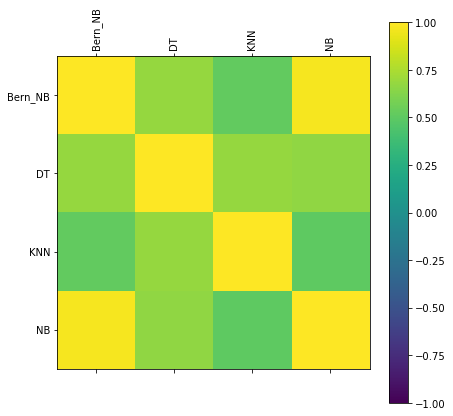

In [13]:
# plot correlation matrix
fig = plt.figure()
fig.set_size_inches(7, 7)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(all_preds_train.columns, rotation=90)
ax.set_yticklabels(all_preds_train.columns)
plt.show()

## Compare important features for each model:

In [14]:
np.set_printoptions(precision=3, suppress=True) #round to 3 decimals and supress scientific notation

DT_feature_importances = DT.feature_importances_ #the Gini importance
Bern_NB_feature_importances = Bern_NB.feature_log_prob_ #Empirical log probability of features given a class, P(x_i|y).
NB_feature_importances = NB.sigma_ #variance of each feature per class
#KNN_feature_importances = KNN.feature_importances_
#'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [15]:
#Slice dataframes by features selected
DT_features_selected_df = minmax_train_df[minmax_train_df.columns[DT_features_selected]]
DT_features_selected_df.shape

(7765, 102)

In [16]:
# Create a dataframe with features
DT_feature_dataframe = pd.DataFrame({'features': DT_features_selected_df.columns,
                                     'DT_feature_importances': DT_feature_importances})
DT_feature_dataframe = DT_feature_dataframe.sort_values(by='DT_feature_importances', axis=0, ascending=False)
DT_feature_dataframe.head(26)

,DT_feature_importances,features
89,0.287568,quantity_dry
0,0.174779,longitude
101,0.163201,waterpoint_type_other
99,0.133458,waterpoint_type_communal standpipe multiple
91,0.045505,quantity_insufficient
77,0.043614,scheme_management_Water authority
80,0.028964,extraction_type_class_gravity
84,0.016498,extraction_type_class_submersible
26,0.014384,installer_DA
79,0.013144,permit_True


In [17]:
#remove unimportant features:
DT_feature_dataframe_no_zeros = DT_feature_dataframe[DT_feature_dataframe.DT_feature_importances != 0]
DT_feature_dataframe_no_zeros.shape

(26, 2)

In [18]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = DT_feature_dataframe_no_zeros['DT_feature_importances'].values,
    x = DT_feature_dataframe_no_zeros['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 10,
        color = DT_feature_dataframe_no_zeros['DT_feature_importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = DT_feature_dataframe_no_zeros['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'DT Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [19]:
data = pd.read_csv("features.csv", sep=',', index_col="id") 
data = data.dropna()
data["waterpoint_type"].value_counts()

communal standpipe             20307
communal standpipe multiple     4771
hand pump                       1396
other                           1194
improved spring                   76
cattle trough                     64
dam                                5
Name: waterpoint_type, dtype: int64

## Create an array where the prediction set of each model is a 'feature':

In [20]:
#reshape predictions:
DT_preds_train = DT_preds_train.reshape(DT_preds_train.shape[0], 1)
NB_preds_train = NB_preds_train.reshape(NB_preds_train.shape[0], 1)
Bern_NB_preds_train = Bern_NB_preds_train.reshape(Bern_NB_preds_train.shape[0], 1)
KNN_preds_train = KNN_preds_train.reshape(KNN_preds_train.shape[0], 1)


#reshape predictions:
DT_preds_validation = DT_preds_validation.reshape(DT_preds_validation.shape[0], 1)
NB_preds_validation = NB_preds_validation.reshape(NB_preds_validation.shape[0], 1)
Bern_NB_preds_validation = Bern_NB_preds_validation.reshape(Bern_NB_preds_validation.shape[0], 1)
KNN_preds_validation = KNN_preds_validation.reshape(KNN_preds_validation.shape[0], 1)

In [21]:
#combine predictions:
model_preds_train = np.concatenate((DT_preds_train, NB_preds_train, Bern_NB_preds_train, KNN_preds_train), axis=1)
print(model_preds_train.shape)

model_preds_validation = np.concatenate((DT_preds_validation, NB_preds_validation, Bern_NB_preds_validation,
                                         KNN_preds_validation), axis=1)
print(model_preds_validation.shape)

(7765, 4)
(2588, 4)


In [22]:
#make the class data numeric for XGBoost: 
def make_numeric(array):
    #define classes:
    my_dict = {'functional':0, 'functional needs repair':1, 'non functional':2}

    #copy the array:
    numeric_array = np.copy(array)
    
    #change the values:
    for key, value in my_dict.items(): 
        numeric_array[array==key] = value
    
    return numeric_array

numeric_model_preds_train = make_numeric(model_preds_train)
numeric_model_preds_validation= make_numeric(model_preds_validation)

numeric_class_train= make_numeric(class_train)
numeric_class_validation= make_numeric(class_validation)

## XGBoost:

In [23]:
import xgboost as xgb

my_booster = xgb.XGBClassifier(
    learning_rate = 0.1,
    n_estimators= 50, # Number of boosted trees to fit
    max_depth= 4,
    min_child_weight= 1, # Minimum sum of instance weight(hessian) needed in a child
    gamma=.5, # Minimum loss reduction required to make a further partition on a leaf node of the tree
    subsample=1, # Subsample ratio of the training instance (to make the whole thing run faster)
    colsample_bytree=1,# Subsample ratio of columns when constructing each tree
    objective= 'multi:softmax', # multi-class classification using the softmax objective
    )

C:\Users\Renel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [24]:
#fit the model to the training predicitons:
my_booster.fit(numeric_model_preds_train, numeric_class_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.5, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [25]:
#save the predictions:
predictions = my_booster.predict(numeric_model_preds_train)

#compute the accuracy:
accuracy = np.sum(predictions == numeric_class_train) / numeric_class_train.shape[0]
print("Accuracy: {}%".format(round(accuracy*100)))

Accuracy: 85.0%


In [26]:
#save the predictions:
predictions = my_booster.predict(numeric_model_preds_validation)

#compute the accuracy:
accuracy = np.sum(predictions == numeric_class_validation) / numeric_class_validation.shape[0]
print("Accuracy: {}%".format(round(accuracy*100)))

Accuracy: 79.0%


In [ ]:
from sklearn.model_selection import KFold
import scipy.stats as stats
import statsmodels.stats.api as sms
import xgboost as xgb

########################################################################
def find_XGBoost_parameters(data, target, kfolds=10, n_estimators_range=range(50, 100, 5), max_depth_range =range(4,15,1),
                           min_child_weight_range=range(1,5,1), gamma_range=np.arange(.5,2,.5)):
    mean_scores = []
    cv_scores = {} 
    counter = 0 
    results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'min_child_weight', 'gamma', 'average CV accuracy'])
    
    for i_estimators in n_estimators_range:
        for i_max_depth in max_depth_range:
            for i_min_child_weight in min_child_weight_range:
                for i_gamma in gamma_range:
                    #create the classifier object:
                    my_booster = xgb.XGBClassifier(
                        learning_rate = 0.1,
                        n_estimators= i_estimators, # Number of boosted trees to fit
                        max_depth= i_max_depth,
                        min_child_weight= i_min_child_weight, # Minimum sum of instance weight(hessian) needed in a child
                        gamma=i_gamma, # Minimum loss reduction required to make a further partition on a leaf node of the tree
                        subsample=1, # Subsample ratio of the training instance (to make the whole thing run faster)
                        colsample_bytree=1,# Subsample ratio of columns when constructing each tree
                        objective= 'multi:softmax', # multi-class classification using the softmax objective
                    )
                    
                    
                    scores = []
                    #perform k-fold CV and compute accuracy scores:
                    #initialize the KFold() function:
                    kf = KFold(n_splits=kfolds)
                    #fit it to the data:
                    kf.get_n_splits(data)
                    for train_index, test_index in kf.split(data):
                        #fit the model to the training predicitons:
                        my_booster.fit(data[train_index], target[train_index])
                        #save the predictions:
                        predictions = my_booster.predict(data[test_index])
                        #compute the accuracy:
                        accuracy = np.sum(predictions == target[test_index]) / predictions.shape[0]
                        scores.append(accuracy)                  
                    
                    #append the results to a dataframe:
                    results.loc[counter] = [i_estimators, i_max_depth, i_min_child_weight, i_gamma, np.mean(scores)]
                    #add the list of scores to the dictionary:
                    cv_scores[counter] = scores
                    #add the mean accuracy to an array:
                    mean_scores = np.append(mean_scores, np.mean(scores))

                    counter+=1

    
    #find the optimal schema:
    optimal_indicies = np.where(mean_scores == mean_scores.max())[0]
    print("Optimal schema:")
    print(results.loc[optimal_indicies])
    
    #compute the ANOVA F-value for the CV scores:
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('ANOVA F-value for the all the schema\'s CV scores:')
    print(stats.f_oneway(*cv_scores.values()))
    print('-------------------------------------------------------------------------------------')
    
    #hash results by optimal indicies:
    optimal_results = results.iloc[optimal_indicies]
    
    #find the index which has the least tree complexity:
    optimal_index = optimal_results['n_estimators' and 'max_depth'].idxmin()
    
    #compute the confidence interval for the highest accuracy + least complexity:
    best_scores = cv_scores[int(optimal_index)]
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('95% Confidence Interval for the highest accuracy score + least complex model:')
    print(sms.DescrStatsW(best_scores).tconfint_mean())
    print('-------------------------------------------------------------------------------------')
    print('\n')
    
    return results, cv_scores, optimal_index

C:\Users\Renel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [ ]:
import datetime
a = datetime.datetime.now()

XGBoost_results, XGBoost_cv_scores, XGBoost_optimal_index = find_XGBoost_parameters(numeric_model_preds_train, 
                                                                                    numeric_class_train, kfolds=10,
                                                                                    n_estimators_range=range(50, 100, 5), 
                                                                                    max_depth_range=range(4,15,1),
                                                                                    min_child_weight_range=range(1,5,1), 
                                                                                    gamma_range=np.arange(.5,2,.5))
b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))

#### This error only occured because there were so many optimal indicies, which broke int(optimal_index) because it can only handle a length-1 arrays. Though we lost some of the results, we can see that the optimal accuracy was 84.7258% and this was achieved with many different parameters. We can also see that the F-test has failed, and thus none of the models are significantly different. Thus, we will choose the model with the least complexity.

In [153]:
import datetime
a = datetime.datetime.now()

XGBoost_results, XGBoost_cv_scores, XGBoost_optimal_index = find_XGBoost_parameters(numeric_model_preds_train, 
                                                                                    numeric_class_train, kfolds=10, 
                                                                                    n_estimators_range=range(10, 15, 1), 
                                                                                    max_depth_range=[4],
                                                                                    min_child_weight_range=[4], 
                                                                                    gamma_range=[.5])
b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))

Optimal schema:
   n_estimators  max_depth  min_child_weight  gamma  average CV accuracy
0          10.0        4.0               4.0    0.5             0.847258
1          11.0        4.0               4.0    0.5             0.847258
2          12.0        4.0               4.0    0.5             0.847258
3          13.0        4.0               4.0    0.5             0.847258
4          14.0        4.0               4.0    0.5             0.847258


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=0.0, pvalue=1.0)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score + least complex model:
(0.83846468098201077, 0.85605130038964072)
-----------------------------------------------------------------------

# Random Forest:

In [242]:
from sklearn.model_selection import KFold
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.ensemble import RandomForestClassifier

########################################################################
def find_RF_parameters(data, target, kfolds=10, n_estimators_range=range(10, 25, 5), max_depth_range =range(4,15,1),
                           min_samples_split_range=range(50,100,5)):
    mean_scores = []
    cv_scores = {} 
    counter = 0 
    results = pd.DataFrame(columns=['n_estimators', 'max_depth', 'min_samples_split', 'average CV accuracy'])
    
    for i_estimators in n_estimators_range:
        for i_max_depth in max_depth_range:
            for i_min_samples_split in min_samples_split_range:
                #create the classifier object:
                RF = RandomForestClassifier(n_estimators=i_estimators, criterion='gini', max_depth=i_max_depth, 
                                            min_samples_split=i_min_samples_split)
                #compute CV scores:
                scores = cross_validation.cross_val_score(RF, data, target, cv=kfolds)
                #append the results to a dataframe:
                results.loc[counter] = [i_estimators, i_max_depth, i_min_samples_split, np.mean(scores)]
                #add the list of scores to the dictionary:
                cv_scores[counter] = scores
                #add the mean accuracy to an array:
                mean_scores = np.append(mean_scores, np.mean(scores))

                counter+=1

    
    #find the optimal schema:
    optimal_indicies = np.where(mean_scores == mean_scores.max())[0]
    print("Optimal schema:")
    print(results.loc[optimal_indicies])
    
    #compute the ANOVA F-value for the CV scores:
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('ANOVA F-value for the all the schema\'s CV scores:')
    print(stats.f_oneway(*cv_scores.values()))
    print('-------------------------------------------------------------------------------------')
    
    #hash results by optimal indicies:
    optimal_results = results.iloc[optimal_indicies]
    
    #find the index which has the least tree complexity:
    optimal_index = optimal_results['n_estimators' and 'max_depth'].idxmin()
    
    #compute the confidence interval for the highest accuracy + least complexity:
    best_scores = cv_scores[int(optimal_index)]
    print('\n')
    print('-------------------------------------------------------------------------------------')
    print('95% Confidence Interval for the highest accuracy score + least complex model:')
    print(sms.DescrStatsW(best_scores).tconfint_mean())
    print('-------------------------------------------------------------------------------------')
    print('\n')
    
    return results, cv_scores, optimal_index

In [245]:
import datetime
a = datetime.datetime.now()

RF_results, RF_cv_scores, RF_optimal_index = find_RF_parameters(DT_minmax_train, class_train, kfolds=10, 
                                                                n_estimators_range=range(10, 25, 5), 
                                                                max_depth_range =range(4,15,1),
                                                                min_samples_split_range=range(50,100,5))

b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))

Optimal schema:
    n_estimators  max_depth  min_samples_split  average CV accuracy
80          10.0       12.0               50.0             0.791374


-------------------------------------------------------------------------------------
ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=13.344183341271734, pvalue=0.0)
-------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------
95% Confidence Interval for the highest accuracy score + least complex model:
(0.78511475670022546, 0.79763352091369888)
-------------------------------------------------------------------------------------



Time to compute: 0:05:30.179133


In [250]:
#look at feature importances from the best ensemble:
RF_feature_importances = RF.feature_importances_ 

In [54]:
#Slice dataframes by features selected
DT_features_selected_df = minmax_train_df[minmax_train_df.columns[DT_features_selected]]
DT_features_selected_df.shape

(7765, 102)

In [261]:
# Create a dataframe with features
RF_feature_dataframe = pd.DataFrame({'features': DT_features_selected_df.columns,
                                     'RF_feature_importances': RF_feature_importances})
RF_feature_dataframe = RF_feature_dataframe.sort_values(by='RF_feature_importances', axis=0, ascending=False)
RF_feature_dataframe.head(15)

,RF_feature_importances,features
89,0.148492,quantity_dry
101,0.141973,waterpoint_type_other
0,0.133455,longitude
39,0.077545,basin_Lake Tanganyika
98,0.066232,waterpoint_type_communal standpipe
90,0.065714,quantity_enough
99,0.053200,waterpoint_type_communal standpipe multiple
48,0.030774,region_Kigoma
12,0.024528,funder_Norad
60,0.021929,lga_Kigoma Rural


In [257]:
#remove unimportant features:
RF_feature_dataframe_no_zeros = RF_feature_dataframe[RF_feature_dataframe.RF_feature_importances != 0]
RF_feature_dataframe_no_zeros.shape

(58, 2)

In [260]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = RF_feature_dataframe_no_zeros['RF_feature_importances'].values,
    x = RF_feature_dataframe_no_zeros['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 7,
        color = RF_feature_dataframe_no_zeros['RF_feature_importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = RF_feature_dataframe_no_zeros['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'RF Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


# Compare finalists with a t-test:

In [240]:
XGBoost_cv_scores[XGBoost_optimal_index]

[0.85328185328185324,
 0.85070785070785071,
 0.87516087516087515,
 0.84555984555984554,
 0.85328185328185324,
 0.84149484536082475,
 0.83505154639175261,
 0.83247422680412375,
 0.83762886597938147,
 0.84793814432989689]

In [251]:
RF_cv_scores[RF_optimal_index]

array([ 0.78 ,  0.804,  0.795,  0.79 ,  0.786,  0.788,  0.792,  0.78 ,
        0.794,  0.805])

In [241]:
ensemble_hard_cv_scores[int(ensemble_hard_optimal_index)]

array([ 0.78 ,  0.789,  0.802,  0.795,  0.789,  0.777,  0.782,  0.769,
        0.799,  0.8  ])

In [265]:
from scipy.stats import ttest_ind
print('XGBoost vs. Stacked Ensemble with Hard Voting:')
print(ttest_ind(XGBoost_cv_scores[XGBoost_optimal_index], ensemble_hard_cv_scores[int(ensemble_hard_optimal_index)]))

XGBoost vs. Stacked Ensemble with Hard Voting:
Ttest_indResult(statistic=11.3687036094459, pvalue=1.1984851708036782e-09)


In [253]:
print('Random Forest vs. Stacked Ensemble with Hard Voting:')
ttest_ind(RF_cv_scores[RF_optimal_index], ensemble_hard_cv_scores[int(ensemble_hard_optimal_index)])

Random Forest vs. Stacked Ensemble with Hard Voting:


Ttest_indResult(statistic=0.70057562450302047, pvalue=0.49252519881466461)

In [254]:
print('Random Forest vs. XGBoost:')
ttest_ind(RF_cv_scores[RF_optimal_index], XGBoost_cv_scores[XGBoost_optimal_index])

Random Forest vs. XGBoost:


Ttest_indResult(statistic=-11.712298126758002, pvalue=7.451130249869516e-10)

In [255]:
print('ANOVA F-value for the all the schema\'s CV scores:')
print(stats.f_oneway(RF_cv_scores[RF_optimal_index], XGBoost_cv_scores[XGBoost_optimal_index], 
                     ensemble_hard_cv_scores[int(ensemble_hard_optimal_index)]))

ANOVA F-value for the all the schema's CV scores:
F_onewayResult(statistic=95.622956447326359, pvalue=5.5929148104928943e-13)


# Compute accuracy scores on the test set:

## Import and combine training and validation sets:

In [266]:
#import clean training data:
minmax_train_target_df = pd.read_csv('minmax_train_target_df.csv')

#split features and target:
minmax_train_df = minmax_train_target_df[minmax_train_target_df.columns[:-1]]
class_train_df = minmax_train_target_df[minmax_train_target_df.columns[-1:]]

#create numpy arrays:
minmax_train = np.array(minmax_train_df)
class_train = np.array(class_train_df)

#import and reshape feature sets for indexing: 
DT_features_selected = np.array(pd.read_csv('DT_features_selected.csv', header=None))
DT_features_selected = DT_features_selected.reshape(1,DT_features_selected.shape[0])
DT_features_selected = DT_features_selected[0]

NB_features_selected = np.array(pd.read_csv('NB_features_selected.csv', header=None))
NB_features_selected = NB_features_selected.reshape(1,NB_features_selected.shape[0])
NB_features_selected = NB_features_selected[0]

Bern_NB_features_selected = np.array(pd.read_csv('Bern_NB_features_selected.csv', header=None))
Bern_NB_features_selected = Bern_NB_features_selected.reshape(1,Bern_NB_features_selected.shape[0])
Bern_NB_features_selected = Bern_NB_features_selected[0]

KNN_features_selected = np.array(pd.read_csv('KNN_features_selected.csv', header=None))
KNN_features_selected = KNN_features_selected.reshape(1,KNN_features_selected.shape[0])
KNN_features_selected = KNN_features_selected[0]

#slice dataframes by feature sets:
DT_minmax_train = minmax_train[:, DT_features_selected]
NB_minmax_train = minmax_train[:, NB_features_selected]
Bern_NB_minmax_train = minmax_train[:, Bern_NB_features_selected]
KNN_minmax_train = minmax_train[:, KNN_features_selected]

#reshape the target array for cross validation in scikit-learn:
cols, rows = class_train.shape
class_train = class_train.reshape(cols,)

print(DT_minmax_train.shape)
print(NB_minmax_train.shape)
print(Bern_NB_minmax_train.shape)
print(KNN_minmax_train.shape)

print('\n', class_train[:5])
print(class_train.shape)

(7765, 102)
(7765, 14)
(7765, 12)
(7765, 89)

 ['non functional' 'functional' 'functional' 'functional' 'non functional']
(7765,)


In [267]:
#import clean validation data:
minmax_validation_target_df = pd.read_csv('minmax_validation_target_df.csv')


#split features and target:
minmax_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[:-1]]
class_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[-1:]]


#create numpy arrays:
minmax_validation = np.array(minmax_validation_df)
class_validation = np.array(class_validation_df)


#reshape the target array for cross validation in scikit-learn:
cols, rows = class_validation.shape
class_validation = class_validation.reshape(cols,)


#import and reshape feature sets for indexing: 
DT_features_selected = np.array(pd.read_csv('DT_features_selected.csv', header=None))
DT_features_selected = DT_features_selected.reshape(1,DT_features_selected.shape[0])
DT_features_selected = DT_features_selected[0]

NB_features_selected = np.array(pd.read_csv('NB_features_selected.csv', header=None))
NB_features_selected = NB_features_selected.reshape(1,NB_features_selected.shape[0])
NB_features_selected = NB_features_selected[0]

Bern_NB_features_selected = np.array(pd.read_csv('Bern_NB_features_selected.csv', header=None))
Bern_NB_features_selected = Bern_NB_features_selected.reshape(1,Bern_NB_features_selected.shape[0])
Bern_NB_features_selected = Bern_NB_features_selected[0]

KNN_features_selected = np.array(pd.read_csv('KNN_features_selected.csv', header=None))
KNN_features_selected = KNN_features_selected.reshape(1,KNN_features_selected.shape[0])
KNN_features_selected = KNN_features_selected[0]


#slice dataframes by feature sets:
DT_minmax_validation = minmax_validation[:, DT_features_selected]
NB_minmax_validation = minmax_validation[:, NB_features_selected]
Bern_NB_minmax_validation  = minmax_validation[:, Bern_NB_features_selected]
KNN_minmax_validation = minmax_validation[:, KNN_features_selected]


print(DT_minmax_validation.shape)
print(NB_minmax_validation.shape)
print(Bern_NB_minmax_validation.shape)
print(KNN_minmax_validation.shape)

print('\n', class_validation[:5])
print(class_validation.shape)

(2588, 102)
(2588, 14)
(2588, 12)
(2588, 89)

 ['functional needs repair' 'non functional' 'functional' 'functional' 'functional']
(2588,)


In [268]:
#combine training and validation sets:
DT_minmax_train_validation = np.concatenate((DT_minmax_validation, DT_minmax_train), axis=0)
NB_minmax_train_validation = np.concatenate((NB_minmax_validation, NB_minmax_train), axis=0)
Bern_NB_minmax_train_validation = np.concatenate((Bern_NB_minmax_validation, Bern_NB_minmax_train), axis=0)
KNN_minmax_train_validation = np.concatenate((KNN_minmax_validation, KNN_minmax_train), axis=0)

class_train_validation = np.concatenate((class_validation, class_train), axis=0)

print(DT_minmax_train_validation.shape)
print(NB_minmax_train_validation.shape)
print(Bern_NB_minmax_train_validation.shape)
print(KNN_minmax_train_validation.shape)

print('\n', class_train_validation.shape)

(10353, 102)
(10353, 14)
(10353, 12)
(10353, 89)

 (10353,)


In [270]:
#import clean test data:
minmax_test_target_df = pd.read_csv('minmax_test_target_df.csv')


#split features and target:
minmax_test_df = minmax_test_target_df[minmax_test_target_df.columns[:-1]]
class_test_df = minmax_test_target_df[minmax_test_target_df.columns[-1:]]


#create numpy arrays:
minmax_test = np.array(minmax_test_df)
class_test = np.array(class_test_df)


#reshape the target array for cross validation in scikit-learn:
cols, rows = class_test.shape
class_test = class_test.reshape(cols,)


#import and reshape feature sets for indexing: 
DT_features_selected = np.array(pd.read_csv('DT_features_selected.csv', header=None))
DT_features_selected = DT_features_selected.reshape(1,DT_features_selected.shape[0])
DT_features_selected = DT_features_selected[0]

NB_features_selected = np.array(pd.read_csv('NB_features_selected.csv', header=None))
NB_features_selected = NB_features_selected.reshape(1,NB_features_selected.shape[0])
NB_features_selected = NB_features_selected[0]

Bern_NB_features_selected = np.array(pd.read_csv('Bern_NB_features_selected.csv', header=None))
Bern_NB_features_selected = Bern_NB_features_selected.reshape(1,Bern_NB_features_selected.shape[0])
Bern_NB_features_selected = Bern_NB_features_selected[0]

KNN_features_selected = np.array(pd.read_csv('KNN_features_selected.csv', header=None))
KNN_features_selected = KNN_features_selected.reshape(1,KNN_features_selected.shape[0])
KNN_features_selected = KNN_features_selected[0]


#slice dataframes by feature sets:
DT_minmax_test = minmax_test[:, DT_features_selected]
NB_minmax_test = minmax_test[:, NB_features_selected]
Bern_NB_minmax_test  = minmax_test[:, Bern_NB_features_selected]
KNN_minmax_test = minmax_test[:, KNN_features_selected]


print(DT_minmax_test.shape)
print(NB_minmax_test.shape)
print(Bern_NB_minmax_test.shape)
print(KNN_minmax_test.shape)

print('\n', class_test[:5])
print(class_test.shape)

(2589, 102)
(2589, 14)
(2589, 12)
(2589, 89)

 ['functional' 'non functional' 'functional' 'functional' 'non functional']
(2589,)


## Train the models on the training + validation data:

### XGBoost:

#### Train DT Model:

In [293]:
from sklearn import tree

#create classifier object:
DT = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=15)

#train the model:
DT = DT.fit(DT_minmax_train_validation, class_train_validation)

#get predictions on train_validation set:
DT_preds_train_validation = DT.predict(DT_minmax_train_validation)

#get predictions on test set:
DT_preds_test = DT.predict(DT_minmax_test)

#### Train Bernoulli NB Model:

In [294]:
from sklearn import naive_bayes

#create classifier object:
Bern_NB = naive_bayes.BernoulliNB()

#train the model:
Bern_NB = Bern_NB.fit(Bern_NB_minmax_train_validation, class_train_validation)

#get predictions on train_validation set:
Bern_NB_preds_train_validation = Bern_NB.predict(Bern_NB_minmax_train_validation)

#get predictions on test set:
Bern_NB_preds_test = Bern_NB.predict(Bern_NB_minmax_test)

#### Train Gaussian NB Model:

In [295]:
from sklearn import naive_bayes

#create classifier object:
NB = naive_bayes.GaussianNB()

#train the model:
NB = NB.fit(NB_minmax_train_validation, class_train_validation)

#get predictions on train_validation set:
NB_preds_train_validation = NB.predict(NB_minmax_train_validation)

#get predictions on test set:
NB_preds_test = NB.predict(NB_minmax_test)

#### Train KNN Model:

In [297]:
from sklearn import neighbors

#create classifier object:
KNN = neighbors.KNeighborsClassifier(n_neighbors=14, metric='jaccard', weights='distance')

#train the model:
KNN = KNN.fit(KNN_minmax_train_validation, class_train_validation)

#get predictions on train_validation set:
KNN_preds_train_validation = KNN.predict(KNN_minmax_train_validation)

#get predictions on test set:
KNN_preds_test = KNN.predict(KNN_minmax_test)

#### Create an array where the prediction set of each model is a 'feature':

In [298]:
#reshape predictions:
DT_preds_train_validation= DT_preds_train_validation.reshape(DT_preds_train_validation.shape[0], 1)
NB_preds_train_validation = NB_preds_train_validation.reshape(NB_preds_train_validation.shape[0], 1)
Bern_NB_preds_train_validation = Bern_NB_preds_train_validation.reshape(Bern_NB_preds_train_validation.shape[0], 1)
KNN_preds_train_validation = KNN_preds_train_validation.reshape(KNN_preds_train_validation.shape[0], 1)

#reshape predictions:
DT_preds_test= DT_preds_test.reshape(DT_preds_test.shape[0], 1)
NB_preds_test = NB_preds_test.reshape(NB_preds_test.shape[0], 1)
Bern_NB_preds_test = Bern_NB_preds_test.reshape(Bern_NB_preds_test.shape[0], 1)
KNN_preds_test = KNN_preds_test.reshape(KNN_preds_test.shape[0], 1)

In [299]:
#combine predictions:
model_preds_train_validation = np.concatenate((DT_preds_train_validation, NB_preds_train_validation, 
                                               Bern_NB_preds_train_validation, KNN_preds_train_validation), axis=1)
print(model_preds_train_validation.shape)

#combine predictions:
model_preds_test = np.concatenate((DT_preds_test, NB_preds_test, Bern_NB_preds_test, KNN_preds_test), axis=1)
print(model_preds_test.shape)

(10353, 4)
(2589, 4)


In [303]:
#make the class data numeric for XGBoost: 
def make_numeric(array):
    #define classes:
    my_dict = {'functional':0, 'functional needs repair':1, 'non functional':2}

    #copy the array:
    numeric_array = np.copy(array)
    
    #change the values:
    for key, value in my_dict.items(): 
        numeric_array[array==key] = value
    
    return numeric_array

#train_validation predictions (used to train XGBoost)
numeric_model_preds_train_validation = make_numeric(model_preds_train_validation)
print(numeric_model_preds_train_validation.shape)

#train_validation actuals (used to train XGBoost)
numeric_class_train_validation = make_numeric(class_train_validation)
print(numeric_class_train_validation.shape)

#test predictions (used to compute accuracy)
numeric_model_preds_test= make_numeric(model_preds_test)
print(numeric_model_preds_test.shape)

#test actuals (used to compute accuracy)
numeric_class_test= make_numeric(class_test)
print(numeric_class_test.shape)

(10353, 4)
(10353,)
(2589, 4)
(2589,)


In [301]:
import xgboost as xgb
my_booster = xgb.XGBClassifier(
    learning_rate = 0.1,
    n_estimators= 10, # Number of boosted trees to fit
    max_depth= 4,
    min_child_weight= 4, # Minimum sum of instance weight(hessian) needed in a child
    gamma=.05, # Minimum loss reduction required to make a further partition on a leaf node of the tree
    subsample=1, # Subsample ratio of the training instance (to make the whole thing run faster)
    colsample_bytree=1,# Subsample ratio of columns when constructing each tree
    objective= 'multi:softmax', # multi-class classification using the softmax objective
    )

In [304]:
#fit the model to the training_validation predicitons and actuals:
my_booster.fit(numeric_model_preds_train_validation, numeric_class_train_validation)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.05, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=4, missing=None, n_estimators=10, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [306]:
#compute the predictions on the test set:
predictions = my_booster.predict(numeric_model_preds_test)

#compute the accuracy on the test set:
accuracy = np.sum(predictions == numeric_class_test) / predictions.shape[0]
print("Accuracy: {}%".format(accuracy*100))

Accuracy: 79.37427578215527%


### Stacking, Hard Voting:

In [308]:
#import clean training data:
minmax_train_target_df = pd.read_csv('minmax_train_target_df.csv')

#split features and target:
minmax_train_df = minmax_train_target_df[minmax_train_target_df.columns[:-1]]
class_train_df = minmax_train_target_df[minmax_train_target_df.columns[-1:]]

#create numpy arrays:
minmax_train = np.array(minmax_train_df)
class_train = np.array(class_train_df)

#reshape the target array for cross validation in scikit-learn:
cols, rows = class_train.shape
class_train = class_train.reshape(cols,)

print(minmax_train.shape)

print('\n', class_train[:5])
print(class_train.shape)

(7765, 1276)

 ['non functional' 'functional' 'functional' 'functional' 'non functional']
(7765,)


In [309]:
#import clean validation data:
minmax_validation_target_df = pd.read_csv('minmax_validation_target_df.csv')


#split features and target:
minmax_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[:-1]]
class_validation_df = minmax_validation_target_df[minmax_validation_target_df.columns[-1:]]


#create numpy arrays:
minmax_validation = np.array(minmax_validation_df)
class_validation = np.array(class_validation_df)


#reshape the target array for cross validation in scikit-learn:
cols, rows = class_validation.shape
class_validation = class_validation.reshape(cols,)

print(minmax_validation.shape)

print('\n', class_validation[:5])
print(class_validation.shape)

(2588, 1276)

 ['functional needs repair' 'non functional' 'functional' 'functional' 'functional']
(2588,)


In [310]:
#combine training and validation sets:
minmax_train_validation = np.concatenate((minmax_validation, minmax_train), axis=0)

class_train_validation = np.concatenate((class_validation, class_train), axis=0)

print(minmax_train_validation.shape)
print('\n', class_train_validation.shape)

(10353, 1276)

 (10353,)


In [311]:
from sklearn.ensemble import VotingClassifier
#create ensemble objects:
ensemble_hard = VotingClassifier(estimators=[('DT', DT), ('Bern_NB', Bern_NB), ('NB', NB), ('KNN', KNN)], voting='hard')

#create feature selection object
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=21)

#get the optimal percentile of features from train_validation set
minmax_train_validation_fs = fs.fit_transform(minmax_train_validation, class_train_validation)

#train model on train_validation set
ensemble_hard = ensemble_hard.fit_transform(minmax_train_validation_fs, class_train_validation)

ValueError: Input X must be non-negative.

In [314]:
minmax_train_validation.min()

-0.039999999999999147

#### Since we normalized the validation set based on the min and max of the training set, we ended up computing at least 1 value out of bounds. So we will normalize the data based on the train + validation sets.

In [402]:
#combine train and validation sets:
train_validation = train.append(validation)
print(train_validation.shape)

class_train_validation = class_train.append(class_validation)
print(class_train_validation.shape)

(10353, 1276)
(10353, 1)


In [403]:
from sklearn import preprocessing

# fit the min_max scaler based on the training_validation data (note: if test data falls outside training data range, this 
#normalization method will fail for those test records)
min_max_scaler = preprocessing.MinMaxScaler().fit(train_validation) 

#normalize all data:
minmax_train_validation = min_max_scaler.transform(train_validation)
minmax_test = min_max_scaler.transform(test)

In [404]:
minmax_test.min()

0.0

In [406]:
minmax_test.max()

1.0

#### Thankfully, nothing in the normalized test set is out of range, so we can continue.

In [411]:
#create numpy array of the classes:
class_train_validation = np.array(class_train_validation)

class_test = np.array(class_test)


#reshape the target array for feature selection in sklearn:
class_train_validation = class_train_validation.ravel()
print(class_train_validation.shape)

class_test = class_test.ravel()
print(class_test.shape)

(10353,)
(2589,)


In [420]:
from sklearn.ensemble import VotingClassifier
#create ensemble objects:
ensemble_hard = VotingClassifier(estimators=[('DT', DT), ('Bern_NB', Bern_NB), ('NB', NB), ('KNN', KNN)], voting='hard')

#create feature selection object
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=21)

import datetime
a = datetime.datetime.now()

#get the optimal percentile of features based on train_validation set
minmax_train_validation_fs = fs.fit(minmax_train_validation, class_train_validation)

#slice the arrays:
minmax_train_validation_fs = fs.transform(minmax_train_validation)
minmax_test_fs = fs.transform(minmax_test)

#train model on train_validation set
ensemble_hard = ensemble_hard.fit(minmax_train_validation_fs, class_train_validation)

b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))


Time to compute: 0:00:00.856633


In [423]:
import datetime
a = datetime.datetime.now()

#compute the predictions on the test set:
predictions = ensemble_hard.predict(minmax_test_fs)

#compute the accuracy on the test set:
accuracy = np.sum(predictions == class_test) / predictions.shape[0]
print("Accuracy: {}%".format(accuracy*100))

b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))

Accuracy: 80.18539976825029%

Time to compute: 0:00:28.834115


### Random Forest:

In [424]:
from sklearn.ensemble import VotingClassifier
#create ensemble objects:
RF = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=12, 
                                            min_samples_split=50)

#create feature selection object (using 8% of the data, as done for DTs)
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=8)

import datetime
a = datetime.datetime.now()

#get the optimal percentile of features from train_validation set
minmax_train_validation_fs = fs.fit(minmax_train_validation, class_train_validation)

#slice the arrays:
minmax_train_validation_fs = fs.transform(minmax_train_validation)
minmax_test_fs = fs.transform(minmax_test)

#train model on train_validation set
RF = RF.fit(minmax_train_validation_fs, class_train_validation)

b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))


Time to compute: 0:00:00.286202


In [425]:
import datetime
a = datetime.datetime.now()

#compute the predictions on the test set:
predictions = RF.predict(minmax_test_fs)

#compute the accuracy on the test set:
accuracy = np.sum(predictions == class_test) / predictions.shape[0]
print("Accuracy: {}%".format(accuracy*100))

b = datetime.datetime.now()
print('\nTime to compute: {}'.format(b-a))

Accuracy: 80.30127462340671%

Time to compute: 0:00:00.009025
